# EPINet batch 생성 및 training

import (tensorflow, numpy) package <br>
numpy use to make numpy array batch data for training <br>
tensorflow use to make EPINet structure

In [1]:
import tensorflow as tf
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


dataset : 4D Light Field dataset, etc(dataset for network training). <br>
model : EPINet structure, etc(Neural Network) <br>
<br>
we use only Light_Field_Dataset, EPINet from dataset, model

In [2]:
from dataset import Light_Field_Dataset
from model import EPINet

Instructions for updating:
Use the retry module or similar alternatives.


make dictionary for training batch set <br>
<br>
dictionary : dataset.light_field <br>
key : light field path <br>
value : light field image numpy arrays <br>
<br>
dictionary : dataset.ground_Truth <br>
key : light field path <br>
value : ground truth of light field image numpy arrays

In [3]:
dataset = Light_Field_Dataset()

already download 4D Light Field Dataset
already extracted 4D Light Field Dataset
make light_field dictionary by image_paths indexing


check values light field images

In [4]:
for image_path in dataset.image_paths:
    print(image_path)
    light_field = dataset.data(image_path)
    for i in range(0, 9):
        for j in range(0, 9):
            if(light_field[i * 9 + j].shape == (512, 512, 1)):
                print ("img", end=" "); print ("|", end=" ");
        print(" ")
    print(" ")

./data/4D Light Field Dataset/full_data/additional/antinous
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
 
./data/4D Light Field Dataset/full_data/additional/boardgames
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | 

img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
 
./data/4D Light Field Dataset/full_data/stratified/backgammon
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img | img | img |  
img | img | img | img | img | img | img 

check values ground truth

In [5]:
for image_path in dataset.image_paths:
    if 'test' in image_path:
        continue
    print(image_path)
    print(dataset.groundTruth(image_path).shape)

./data/4D Light Field Dataset/full_data/additional/antinous
(512, 512)
./data/4D Light Field Dataset/full_data/additional/boardgames
(512, 512)
./data/4D Light Field Dataset/full_data/additional/dishes
(512, 512)
./data/4D Light Field Dataset/full_data/additional/greek
(512, 512)
./data/4D Light Field Dataset/full_data/additional/kitchen
(512, 512)
./data/4D Light Field Dataset/full_data/additional/medieval2
(512, 512)
./data/4D Light Field Dataset/full_data/additional/museum
(512, 512)
./data/4D Light Field Dataset/full_data/additional/pens
(512, 512)
./data/4D Light Field Dataset/full_data/additional/pillows
(512, 512)
./data/4D Light Field Dataset/full_data/additional/platonic
(512, 512)
./data/4D Light Field Dataset/full_data/additional/rosemary
(512, 512)
./data/4D Light Field Dataset/full_data/additional/table
(512, 512)
./data/4D Light Field Dataset/full_data/additional/tomb
(512, 512)
./data/4D Light Field Dataset/full_data/additional/tower
(512, 512)
./data/4D Light Field Data

make epinet structure <br>
make training environment(random, time, datatime)

In [6]:
import time
import datetime

angular_views=[0,1,2,3,4,5,6,7,8]
model_conv_depth=7
model_filt_num=70
model_learning_rate=0.1**5
epinet = EPINet(23,
                23,
                angular_views,
                model_conv_depth,
                model_filt_num,
                model_learning_rate).inference()

start=time.clock()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_stack_90d (InputLayer)    (None, 23, 23, 9)    0                                            
__________________________________________________________________________________________________
input_stack_0d (InputLayer)     (None, 23, 23, 9)    0                                            
__________________________________________________________________________________________________
input_stack_45d (InputLayer)    (None, 23, 23, 9)    0                                            
__________________________________________________________________________________________________
input_stack_M45d (InputLayer)   (None, 23, 23, 9)    0                                            
__________________________________________________________________________________________________
sequential

## training

make training batch X <br>
make training batch Y <br>
training
- data split in memory size(x, y, z)
- data augmentation(n, m)

In [7]:
for image_path in dataset.image_paths:
    light_field = dataset.data(image_path)
    ground_Truth = dataset.groundTruth(image_path)
    if 'test' in image_path:
        continue
    for z in range(0, 7):
        train_x = []
        x_90d = []
        x_0d = []
        x_45d = []
        x_M45d = []
        
        train_y = np.empty((1,1))
        list_y = []
        
        for x in range(z*70, (z+1)*70):
            for y in range(z*70, (z+1)*70):
                tmp = np.empty((23, 23, 1))
                
                one_x_90d = []
                for i in range(4,81,9):
                    one_x_90d.append(light_field[i][x:x+23,y:y+23,:])
                for i in range(0, len(one_x_90d)):
                    if i == 0:
                        tmp = one_x_90d[i]
                        continue
                    tmp = np.append(tmp, one_x_90d[i], axis = 2)
                x_90d.append(tmp)
                
                one_x_0d = []
                for i in range(36,45,1):
                    one_x_0d.append(light_field[i][x:x+23,y:y+23,:])
                for i in range(0, len(one_x_0d)):
                    if i == 0:
                        tmp = one_x_0d[i]
                        continue
                    tmp = np.append(tmp, one_x_0d[i], axis = 2)
                x_0d.append(tmp)
                
                one_x_45d = []
                for i in range(8,80,8):
                    one_x_45d.append(light_field[i][x:x+23,y:y+23,:])
                for i in range(0, len(one_x_45d)):
                    if i == 0:
                        tmp = one_x_45d[i]
                        continue
                    tmp = np.append(tmp, one_x_45d[i], axis = 2)
                x_45d.append(tmp)
                
                one_x_M45d = []
                for i in range(0,81,10):
                    one_x_M45d.append(light_field[i][x:x+23,y:y+23,:])
                for i in range(0, len(one_x_0d)):
                    if i == 0:
                        tmp = one_x_M45d[i]
                        continue
                    tmp = np.append(tmp, one_x_M45d[i], axis = 2)
                x_M45d.append(tmp)
                
                list_y.append(ground_Truth[x+11:x+12, y+11:y+12])
                
        train_x.append(np.array(x_90d))
        train_x.append(np.array(x_0d))
        train_x.append(np.array(x_45d))
        train_x.append(np.array(x_M45d))
        
        train_y = np.array(list_y).reshape((4900, 1, 1, 1))
        
        del(x_90d)
        del(x_0d)
        del(x_45d)
        del(x_M45d)
            
        del(list_y)
                       
        hist = epinet.fit(train_x, train_y, batch_size=16, epochs=100, validation_split=0.2)
        epinet.save_weights('./checkpoints/epinet_non_aug_9x9.hdf5')

Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 14s 4ms/step - loss: 0.7289 - val_loss: 1.6719
Epoch 2/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.3374 - val_loss: 4.3361
Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.3150 - val_loss: 5.3801
Epoch 4/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.2786 - val_loss: 4.1035
Epoch 5/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.2711 - val_loss: 4.7194
Epoch 6/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.2496 - val_loss: 3.5890
Epoch 7/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.2374 - val_loss: 1.2291
Epoch 8/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.2235 - val_loss: 3.6384
Epoch 9/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.2113 - val_loss: 2.5104
Epoch 10/100
3920/3920 [

Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0307 - val_loss: 9.3560
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0319 - val_loss: 10.1906
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0314 - val_loss: 9.4464
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0297 - val_loss: 7.1679
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0307 - val_loss: 9.3063
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0311 - val_loss: 9.8767
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0315 - val_loss: 7.9427
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0296 - val_loss: 9.8279
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0300 - val_loss: 9.2397
Epoch 88/100
3920/3920 [==============================] - 9s 2m

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0467 - val_loss: 0.0635
Epoch 58/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0464 - val_loss: 0.0643
Epoch 59/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0479 - val_loss: 0.0261
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0506 - val_loss: 0.0254
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0453 - val_loss: 0.0589
Epoch 62/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0435 - val_loss: 0.0275
Epoch 63/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0464 - val_loss: 0.0610
Epoch 64/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0462 - val_loss: 0.0793
Epoch 65/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0478 - val_loss: 0.0379
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0563 - val_loss: 0.5049
Epoch 36/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0597 - val_loss: 0.5321
Epoch 37/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0610 - val_loss: 0.5283
Epoch 38/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0660 - val_loss: 0.5543
Epoch 39/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0565 - val_loss: 0.4730
Epoch 40/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0593 - val_loss: 0.4652
Epoch 41/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0562 - val_loss: 0.5049
Epoch 42/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0569 - val_loss: 0.6432
Epoch 43/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0528 - val_loss: 0.5111
Epoch 44/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0343 - val_loss: 0.0988
Epoch 14/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0332 - val_loss: 0.1507
Epoch 15/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0327 - val_loss: 0.1228
Epoch 16/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0321 - val_loss: 0.0799
Epoch 17/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0312 - val_loss: 0.1038
Epoch 18/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0305 - val_loss: 0.0974
Epoch 19/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0301 - val_loss: 0.0881
Epoch 20/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0302 - val_loss: 0.1075
Epoch 21/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0287 - val_loss: 0.1042
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss

Epoch 92/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0176 - val_loss: 0.0778
Epoch 93/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0180 - val_loss: 0.0947
Epoch 94/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0181 - val_loss: 0.0928
Epoch 95/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0170 - val_loss: 0.0946
Epoch 96/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0173 - val_loss: 0.1114
Epoch 97/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0170 - val_loss: 0.1410
Epoch 98/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0170 - val_loss: 0.0944
Epoch 99/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0171 - val_loss: 0.1057
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0173 - val_loss: 0.1505
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0233 - val_loss: 0.1435
Epoch 71/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0237 - val_loss: 0.0987
Epoch 72/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0219 - val_loss: 0.1374
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0253 - val_loss: 0.0811
Epoch 74/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0231 - val_loss: 0.0875
Epoch 75/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0224 - val_loss: 0.0968
Epoch 76/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0224 - val_loss: 0.0698
Epoch 77/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0222 - val_loss: 0.0610
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0220 - val_loss: 0.1234
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0217 - val_loss: 0.0267
Epoch 49/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0208 - val_loss: 0.0283
Epoch 50/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0206 - val_loss: 0.0214
Epoch 51/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0208 - val_loss: 0.0253
Epoch 52/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0209 - val_loss: 0.0697
Epoch 53/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0205 - val_loss: 0.0226
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0210 - val_loss: 0.0212
Epoch 55/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0206 - val_loss: 0.0374
Epoch 56/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0202 - val_loss: 0.0232
Epoch 57/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0603 - val_loss: 2.2539
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0586 - val_loss: 1.0383
Epoch 28/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0579 - val_loss: 1.0263
Epoch 29/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0580 - val_loss: 2.4881
Epoch 30/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0561 - val_loss: 2.4204
Epoch 31/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0567 - val_loss: 1.5635
Epoch 32/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0545 - val_loss: 1.6690
Epoch 33/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0532 - val_loss: 2.8751
Epoch 34/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0522 - val_loss: 1.2590
Epoch 35/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0422 - val_loss: 0.1203
Epoch 5/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0380 - val_loss: 0.1190
Epoch 6/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0360 - val_loss: 0.1028
Epoch 7/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0319 - val_loss: 0.1158
Epoch 8/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0325 - val_loss: 0.1189
Epoch 9/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0321 - val_loss: 0.1146
Epoch 10/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0305 - val_loss: 0.0992
Epoch 11/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0292 - val_loss: 0.1097
Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0280 - val_loss: 0.0972
Epoch 13/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.

Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0149 - val_loss: 0.0928
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0151 - val_loss: 0.1139
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0146 - val_loss: 0.1185
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0149 - val_loss: 0.0891
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0149 - val_loss: 0.1085
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0144 - val_loss: 0.0954
Epoch 89/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0151 - val_loss: 0.1169
Epoch 90/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0144 - val_loss: 0.1073
Epoch 91/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0147 - val_loss: 0.1053
Epoch 92/100
3920/3920 [==============================] - 9s 2ms

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0153 - val_loss: 0.0842
Epoch 62/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0150 - val_loss: 0.0779
Epoch 63/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0148 - val_loss: 0.0822
Epoch 64/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0154 - val_loss: 0.0814
Epoch 65/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0149 - val_loss: 0.0770
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0149 - val_loss: 0.1010
Epoch 67/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0148 - val_loss: 0.0769
Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0151 - val_loss: 0.0888
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0148 - val_loss: 0.0811
Epoch 70/100
3920/3920 [==============================] - 10s 2ms/step - los

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0103 - val_loss: 0.0397
Epoch 40/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0102 - val_loss: 0.0519
Epoch 41/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0103 - val_loss: 0.0449
Epoch 42/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0104 - val_loss: 0.0397
Epoch 43/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0102 - val_loss: 0.0489
Epoch 44/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0102 - val_loss: 0.0548
Epoch 45/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0101 - val_loss: 0.0711
Epoch 46/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0096 - val_loss: 0.0416
Epoch 47/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0099 - val_loss: 0.0373
Epoch 48/100
3920/3920 [==============================] - 10s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0106 - val_loss: 0.1009
Epoch 18/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0105 - val_loss: 0.0917
Epoch 19/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0102 - val_loss: 0.0965
Epoch 20/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0098 - val_loss: 0.0808
Epoch 21/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0096 - val_loss: 0.0969
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0097 - val_loss: 0.1172
Epoch 23/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0096 - val_loss: 0.1074
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0097 - val_loss: 0.1154
Epoch 25/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0090 - val_loss: 0.0924
Epoch 26/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0058 - val_loss: 0.0812
Epoch 96/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0059 - val_loss: 0.0763
Epoch 97/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0056 - val_loss: 0.0848
Epoch 98/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0057 - val_loss: 0.0902
Epoch 99/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0056 - val_loss: 0.0899
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0059 - val_loss: 0.1180
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0702 - val_loss: 0.1774
Epoch 2/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0330 - val_loss: 0.2081
Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0278 - val_loss: 0.2021
Epoch 4/100
3920/3920 [=======

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0061 - val_loss: 0.1577
Epoch 74/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0059 - val_loss: 0.0948
Epoch 75/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0062 - val_loss: 0.1002
Epoch 76/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0061 - val_loss: 0.1342
Epoch 77/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0061 - val_loss: 0.1168
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0061 - val_loss: 0.1442
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0058 - val_loss: 0.0792
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0059 - val_loss: 0.1509
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0058 - val_loss: 0.0821
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0095 - val_loss: 0.0651
Epoch 52/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0098 - val_loss: 0.0748
Epoch 53/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0095 - val_loss: 0.0752
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0092 - val_loss: 0.0807
Epoch 55/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.0845
Epoch 56/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0093 - val_loss: 0.0723
Epoch 57/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.0740
Epoch 58/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0097 - val_loss: 0.0956
Epoch 59/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0091 - val_loss: 0.0735
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0121 - val_loss: 0.0730
Epoch 30/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0125 - val_loss: 0.1640
Epoch 31/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0122 - val_loss: 0.0532
Epoch 32/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0121 - val_loss: 0.1020
Epoch 33/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0115 - val_loss: 0.2065
Epoch 34/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0118 - val_loss: 0.0607
Epoch 35/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0119 - val_loss: 0.0847
Epoch 36/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0120 - val_loss: 0.2763
Epoch 37/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0116 - val_loss: 0.2224
Epoch 38/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0444 - val_loss: 0.0823
Epoch 8/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0399 - val_loss: 0.0723
Epoch 9/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0356 - val_loss: 0.0901
Epoch 10/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0327 - val_loss: 0.2909
Epoch 11/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0309 - val_loss: 0.2169
Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0294 - val_loss: 0.2410
Epoch 13/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0279 - val_loss: 0.0704
Epoch 14/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0278 - val_loss: 0.0741
Epoch 15/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0260 - val_loss: 0.0792
Epoch 16/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0098 - val_loss: 0.2417
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0092 - val_loss: 0.0882
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0089 - val_loss: 0.2302
Epoch 88/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0088 - val_loss: 0.1572
Epoch 89/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0087 - val_loss: 0.2878
Epoch 90/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0087 - val_loss: 0.0751
Epoch 91/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0088 - val_loss: 0.1458
Epoch 92/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0085 - val_loss: 0.0590
Epoch 93/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0083 - val_loss: 0.0564
Epoch 94/100
3920/3920 [==============================] - 10s 2ms/step - lo

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0151 - val_loss: 0.1526
Epoch 64/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0166 - val_loss: 0.1265
Epoch 65/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0148 - val_loss: 0.0804
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0153 - val_loss: 0.0885
Epoch 67/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0150 - val_loss: 0.0843
Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0149 - val_loss: 0.1802
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0143 - val_loss: 0.1927
Epoch 70/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0143 - val_loss: 0.1939
Epoch 71/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0146 - val_loss: 0.1058
Epoch 72/100
3920/3920 [==============================] - 9s 2ms/step - los

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0257 - val_loss: 0.2191
Epoch 42/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0258 - val_loss: 0.2090
Epoch 43/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0262 - val_loss: 0.1994
Epoch 44/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0249 - val_loss: 0.1968
Epoch 45/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0250 - val_loss: 0.2053
Epoch 46/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0243 - val_loss: 0.2082
Epoch 47/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0255 - val_loss: 0.2086
Epoch 48/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0255 - val_loss: 0.2259
Epoch 49/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0242 - val_loss: 0.2110
Epoch 50/100
3920/3920 [==============================] - 9s 2ms/step - los

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0440 - val_loss: 0.2387
Epoch 20/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0418 - val_loss: 0.2523
Epoch 21/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0419 - val_loss: 0.2164
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0412 - val_loss: 0.2538
Epoch 23/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0395 - val_loss: 0.2580
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0374 - val_loss: 0.2403
Epoch 25/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0371 - val_loss: 0.2194
Epoch 26/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0369 - val_loss: 0.2173
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0360 - val_loss: 0.2267
Epoch 28/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0219 - val_loss: 0.2201
Epoch 98/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0216 - val_loss: 0.2341
Epoch 99/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0212 - val_loss: 0.2269
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0213 - val_loss: 0.2450
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.3003 - val_loss: 0.0986
Epoch 2/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.1222 - val_loss: 0.0819
Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0940 - val_loss: 0.0825
Epoch 4/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0832 - val_loss: 0.0663
Epoch 5/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0747 - val_loss: 0.0803
Epoch 6/100
3920/3920 [==========

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0238 - val_loss: 0.0649
Epoch 76/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0222 - val_loss: 0.0688
Epoch 77/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0216 - val_loss: 0.0743
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0219 - val_loss: 0.0575
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0219 - val_loss: 0.0558
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0226 - val_loss: 0.0710
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0217 - val_loss: 0.0616
Epoch 82/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0229 - val_loss: 0.0686
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0211 - val_loss: 0.0715
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0231 - val_loss: 0.2023
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0231 - val_loss: 0.1907
Epoch 55/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0226 - val_loss: 0.2343
Epoch 56/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0225 - val_loss: 0.2368
Epoch 57/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0228 - val_loss: 0.1996
Epoch 58/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0212 - val_loss: 0.2272
Epoch 59/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0219 - val_loss: 0.2238
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0214 - val_loss: 0.2173
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0211 - val_loss: 0.1942
Epoch 62/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0317 - val_loss: 0.4434
Epoch 32/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0305 - val_loss: 0.4386
Epoch 33/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0289 - val_loss: 0.4260
Epoch 34/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0297 - val_loss: 0.5132
Epoch 35/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0288 - val_loss: 0.4360
Epoch 36/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0269 - val_loss: 0.4633
Epoch 37/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0275 - val_loss: 0.4681
Epoch 38/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0280 - val_loss: 0.4251
Epoch 39/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0281 - val_loss: 0.4320
Epoch 40/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0684 - val_loss: 0.1898
Epoch 10/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0642 - val_loss: 0.0904
Epoch 11/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0649 - val_loss: 0.1750
Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0600 - val_loss: 0.1309
Epoch 13/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0551 - val_loss: 0.1369
Epoch 14/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0520 - val_loss: 0.1322
Epoch 15/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0515 - val_loss: 0.1191
Epoch 16/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0476 - val_loss: 0.0638
Epoch 17/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0478 - val_loss: 0.0942
Epoch 18/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0231 - val_loss: 0.0982
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0213 - val_loss: 0.0886
Epoch 89/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0227 - val_loss: 0.1037
Epoch 90/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0219 - val_loss: 0.0839
Epoch 91/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0219 - val_loss: 0.1108
Epoch 92/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0219 - val_loss: 0.1152
Epoch 93/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0224 - val_loss: 0.0924
Epoch 94/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0217 - val_loss: 0.0844
Epoch 95/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0207 - val_loss: 0.0552
Epoch 96/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0093 - val_loss: 0.0727
Epoch 66/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0095 - val_loss: 0.0852
Epoch 67/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.0885
Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0089 - val_loss: 0.0883
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0092 - val_loss: 0.0952
Epoch 70/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0089 - val_loss: 0.0665
Epoch 71/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0091 - val_loss: 0.0890
Epoch 72/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0087 - val_loss: 0.0966
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0088 - val_loss: 0.0842
Epoch 74/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0198 - val_loss: 1.3581
Epoch 44/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0217 - val_loss: 1.1075
Epoch 45/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0205 - val_loss: 0.7823
Epoch 46/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0203 - val_loss: 0.8799
Epoch 47/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0213 - val_loss: 0.8879
Epoch 48/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0200 - val_loss: 1.1112
Epoch 49/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0195 - val_loss: 1.2836
Epoch 50/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0195 - val_loss: 1.0681
Epoch 51/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0191 - val_loss: 1.2616
Epoch 52/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0389 - val_loss: 0.2929
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0350 - val_loss: 0.2986
Epoch 23/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0343 - val_loss: 0.2663
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0332 - val_loss: 0.3553
Epoch 25/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0318 - val_loss: 0.2595
Epoch 26/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0336 - val_loss: 0.2789
Epoch 27/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0326 - val_loss: 0.2269
Epoch 28/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0305 - val_loss: 0.2031
Epoch 29/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0309 - val_loss: 0.2010
Epoch 30/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0201 - val_loss: 0.2285
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0212 - val_loss: 0.2980
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.4732 - val_loss: 0.7969
Epoch 2/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0666 - val_loss: 0.3452
Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0514 - val_loss: 0.2509
Epoch 4/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0410 - val_loss: 0.2920
Epoch 5/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0375 - val_loss: 0.2031
Epoch 6/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0336 - val_loss: 0.2027
Epoch 7/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0309 - val_loss: 0.2373
Epoch 8/100
3920/3920 [=============

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0105 - val_loss: 0.1262
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0105 - val_loss: 0.1275
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0108 - val_loss: 0.1307
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0104 - val_loss: 0.1109
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0103 - val_loss: 0.1657
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0104 - val_loss: 0.1174
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0105 - val_loss: 0.0978
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0108 - val_loss: 0.0992
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0107 - val_loss: 0.1127
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0169 - val_loss: 0.0771
Epoch 56/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0166 - val_loss: 0.0673
Epoch 57/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0164 - val_loss: 0.0747
Epoch 58/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0170 - val_loss: 0.0822
Epoch 59/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0164 - val_loss: 0.0876
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0157 - val_loss: 0.0883
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0167 - val_loss: 0.1105
Epoch 62/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0161 - val_loss: 0.0874
Epoch 63/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0166 - val_loss: 0.0618
Epoch 64/100
3920/3920 [==============================] - 10s 2ms/step - lo

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0449 - val_loss: 0.3363
Epoch 34/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0441 - val_loss: 0.6925
Epoch 35/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0452 - val_loss: 0.3615
Epoch 36/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0418 - val_loss: 0.5589
Epoch 37/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0474 - val_loss: 0.3653
Epoch 38/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0421 - val_loss: 0.4731
Epoch 39/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0406 - val_loss: 0.5133
Epoch 40/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0395 - val_loss: 0.5561
Epoch 41/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0379 - val_loss: 0.7753
Epoch 42/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0215 - val_loss: 0.0438
Epoch 12/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0202 - val_loss: 0.0262
Epoch 13/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0194 - val_loss: 0.0270
Epoch 14/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0170 - val_loss: 0.0325
Epoch 15/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0166 - val_loss: 0.0504
Epoch 16/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0164 - val_loss: 0.0336
Epoch 17/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0156 - val_loss: 0.0512
Epoch 18/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0147 - val_loss: 0.0452
Epoch 19/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0147 - val_loss: 0.0355
Epoch 20/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0072 - val_loss: 0.0268
Epoch 90/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0074 - val_loss: 0.0368
Epoch 91/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0070 - val_loss: 0.0267
Epoch 92/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0072 - val_loss: 0.0187
Epoch 93/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0071 - val_loss: 0.0294
Epoch 94/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0074 - val_loss: 0.0590
Epoch 95/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0072 - val_loss: 0.0200
Epoch 96/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0072 - val_loss: 0.0176
Epoch 97/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0071 - val_loss: 0.0569
Epoch 98/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0117 - val_loss: 0.0403
Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0113 - val_loss: 0.0308
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0118 - val_loss: 0.0798
Epoch 70/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0116 - val_loss: 0.0324
Epoch 71/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0114 - val_loss: 0.0330
Epoch 72/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0115 - val_loss: 0.0603
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0118 - val_loss: 0.0597
Epoch 74/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0113 - val_loss: 0.0348
Epoch 75/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0111 - val_loss: 0.0418
Epoch 76/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0083 - val_loss: 0.0187
Epoch 46/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0083 - val_loss: 0.0109
Epoch 47/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0079 - val_loss: 0.0146
Epoch 48/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0109
Epoch 49/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0080 - val_loss: 0.0111
Epoch 50/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0083 - val_loss: 0.0293
Epoch 51/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0134
Epoch 52/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0148
Epoch 53/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0077 - val_loss: 0.0110
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0279 - val_loss: 0.3134
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0297 - val_loss: 0.3326
Epoch 25/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0290 - val_loss: 0.2655
Epoch 26/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0282 - val_loss: 0.2845
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0277 - val_loss: 0.3119
Epoch 28/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0274 - val_loss: 0.2863
Epoch 29/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0267 - val_loss: 0.2231
Epoch 30/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0257 - val_loss: 0.2687
Epoch 31/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0261 - val_loss: 0.2996
Epoch 32/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0633 - val_loss: 0.3580
Epoch 2/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0312 - val_loss: 0.3620
Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0261 - val_loss: 0.3414
Epoch 4/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0238 - val_loss: 0.2945
Epoch 5/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0223 - val_loss: 0.3230
Epoch 6/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0207 - val_loss: 0.3302
Epoch 7/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0207 - val_loss: 0.3385
Epoch 8/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0185 - val_loss: 0.3373
Epoch 9/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0182 - val_loss: 0.4128
Epoch 10/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0096 - val_loss: 0.3332
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0093 - val_loss: 0.3823
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0092 - val_loss: 0.3481
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.3641
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0097 - val_loss: 0.3757
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0091 - val_loss: 0.2789
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0093 - val_loss: 0.3516
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0100 - val_loss: 0.2857
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.3276
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0066 - val_loss: 0.0320
Epoch 58/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0068 - val_loss: 0.0261
Epoch 59/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0068 - val_loss: 0.0287
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0067 - val_loss: 0.0255
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0066 - val_loss: 0.0253
Epoch 62/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0062 - val_loss: 0.0263
Epoch 63/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0065 - val_loss: 0.0259
Epoch 64/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0064 - val_loss: 0.0310
Epoch 65/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0062 - val_loss: 0.0313
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - lo

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0110 - val_loss: 0.0422
Epoch 36/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0108 - val_loss: 0.0522
Epoch 37/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0110 - val_loss: 0.0505
Epoch 38/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0106 - val_loss: 0.0485
Epoch 39/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0105 - val_loss: 0.0467
Epoch 40/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0101 - val_loss: 0.0447
Epoch 41/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0103 - val_loss: 0.0484
Epoch 42/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0102 - val_loss: 0.0464
Epoch 43/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0098 - val_loss: 0.0457
Epoch 44/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0345 - val_loss: 0.0662
Epoch 14/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0333 - val_loss: 0.0580
Epoch 15/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0332 - val_loss: 0.0614
Epoch 16/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0303 - val_loss: 0.0556
Epoch 17/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0293 - val_loss: 0.0849
Epoch 18/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0266 - val_loss: 0.0715
Epoch 19/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0257 - val_loss: 0.0548
Epoch 20/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0258 - val_loss: 0.0515
Epoch 21/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0279 - val_loss: 0.0473
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0136 - val_loss: 0.0395
Epoch 92/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0150 - val_loss: 0.0445
Epoch 93/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0130 - val_loss: 0.0428
Epoch 94/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0131 - val_loss: 0.0416
Epoch 95/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0145 - val_loss: 0.0388
Epoch 96/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0140 - val_loss: 0.0427
Epoch 97/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0136 - val_loss: 0.0387
Epoch 98/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0131 - val_loss: 0.0380
Epoch 99/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0128 - val_loss: 0.0407
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0086 - val_loss: 0.0222
Epoch 70/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0087 - val_loss: 0.0155
Epoch 71/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0088 - val_loss: 0.0149
Epoch 72/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0084 - val_loss: 0.0192
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0080 - val_loss: 0.0126
Epoch 74/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0084 - val_loss: 0.0165
Epoch 75/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0075 - val_loss: 0.0126
Epoch 76/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0076 - val_loss: 0.0191
Epoch 77/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0082 - val_loss: 0.0126
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0047 - val_loss: 0.1419
Epoch 48/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0048 - val_loss: 0.0594
Epoch 49/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0046 - val_loss: 0.0810
Epoch 50/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0048 - val_loss: 0.0531
Epoch 51/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0046 - val_loss: 0.0752
Epoch 52/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0047 - val_loss: 0.1006
Epoch 53/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0046 - val_loss: 0.1002
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0046 - val_loss: 0.0961
Epoch 55/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0044 - val_loss: 0.0739
Epoch 56/100
3920/3920 [==============================] - 9s 2ms/step - lo

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0090 - val_loss: 0.0127
Epoch 26/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0093 - val_loss: 0.0104
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0122
Epoch 28/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0077 - val_loss: 0.0155
Epoch 29/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0079 - val_loss: 0.0123
Epoch 30/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0085 - val_loss: 0.0135
Epoch 31/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0075 - val_loss: 0.0112
Epoch 32/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0077 - val_loss: 0.0110
Epoch 33/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0077 - val_loss: 0.0102
Epoch 34/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0148 - val_loss: 0.0622
Epoch 4/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0123 - val_loss: 0.0767
Epoch 5/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0107 - val_loss: 0.0638
Epoch 6/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0107 - val_loss: 0.0719
Epoch 7/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0096 - val_loss: 0.0536
Epoch 8/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0092 - val_loss: 0.0706
Epoch 9/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0082 - val_loss: 0.0639
Epoch 10/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0077 - val_loss: 0.0689
Epoch 11/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0682
Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0038 - val_loss: 0.0521
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0039 - val_loss: 0.0609
Epoch 83/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0040 - val_loss: 0.0578
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0038 - val_loss: 0.0718
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0038 - val_loss: 0.0652
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0038 - val_loss: 0.0614
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0038 - val_loss: 0.0562
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0038 - val_loss: 0.0520
Epoch 89/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0037 - val_loss: 0.0589
Epoch 90/100
3920/3920 [==============================] - 9s 2ms/step - los

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0036 - val_loss: 0.2456
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0039 - val_loss: 0.2526
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0036 - val_loss: 0.2674
Epoch 62/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0037 - val_loss: 0.2361
Epoch 63/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0037 - val_loss: 0.2542
Epoch 64/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0035 - val_loss: 0.2485
Epoch 65/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0035 - val_loss: 0.2595
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0035 - val_loss: 0.2500
Epoch 67/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0035 - val_loss: 0.2581
Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0155 - val_loss: 0.2247
Epoch 38/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0140 - val_loss: 0.1424
Epoch 39/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0149 - val_loss: 0.2053
Epoch 40/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0147 - val_loss: 0.2277
Epoch 41/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0148 - val_loss: 0.1908
Epoch 42/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0143 - val_loss: 0.2411
Epoch 43/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0142 - val_loss: 0.2552
Epoch 44/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0141 - val_loss: 0.0918
Epoch 45/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0138 - val_loss: 0.2677
Epoch 46/100
3920/3920 [==============================] - 10s 2ms/step - l

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0136 - val_loss: 0.0612
Epoch 16/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0133 - val_loss: 0.0381
Epoch 17/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0131 - val_loss: 0.0396
Epoch 18/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0130 - val_loss: 0.0410
Epoch 19/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0122 - val_loss: 0.0370
Epoch 20/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0121 - val_loss: 0.0417
Epoch 21/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0127 - val_loss: 0.0448
Epoch 22/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0118 - val_loss: 0.0354
Epoch 23/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0118 - val_loss: 0.0296
Epoch 24/100
3920/3920 [==============================] - 10s 3ms/st

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0066 - val_loss: 0.0319
Epoch 94/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0066 - val_loss: 0.0246
Epoch 95/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0065 - val_loss: 0.0143
Epoch 96/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0069 - val_loss: 0.0350
Epoch 97/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0072 - val_loss: 0.0134
Epoch 98/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0063 - val_loss: 0.0152
Epoch 99/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0065 - val_loss: 0.0199
Epoch 100/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0063 - val_loss: 0.0142
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.5168 - val_loss: 0.1006
Epoch 2/100
3920/3920

Epoch 71/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0140 - val_loss: 0.0457
Epoch 72/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0146 - val_loss: 0.0369
Epoch 73/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0146 - val_loss: 0.0321
Epoch 74/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0140 - val_loss: 0.0285
Epoch 75/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0156 - val_loss: 0.0296
Epoch 76/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0158 - val_loss: 0.0304
Epoch 77/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0145 - val_loss: 0.0348
Epoch 78/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0141 - val_loss: 0.0345
Epoch 79/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0140 - val_loss: 0.0273
Epoch 80/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0086 - val_loss: 0.0236
Epoch 49/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0088 - val_loss: 0.0104
Epoch 50/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0086 - val_loss: 0.0066
Epoch 51/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0084 - val_loss: 0.0108
Epoch 52/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0081 - val_loss: 0.0070
Epoch 53/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0082 - val_loss: 0.0119
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0085 - val_loss: 0.0124
Epoch 55/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0082 - val_loss: 0.0089
Epoch 56/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0082 - val_loss: 0.0204
Epoch 57/100
3920/3920 [==============================] - 9s 2ms/step - 

Epoch 26/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0110 - val_loss: 0.0080
Epoch 27/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 28/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0103 - val_loss: 0.0143
Epoch 29/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0108 - val_loss: 0.0156
Epoch 30/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0103 - val_loss: 0.0177
Epoch 31/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0106 - val_loss: 0.0088
Epoch 32/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0098 - val_loss: 0.0121
Epoch 33/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0102 - val_loss: 0.0114
Epoch 34/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0104 - val_loss: 0.0077
Epoch 35/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0572 - val_loss: 0.0737
Epoch 4/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0474 - val_loss: 0.0661
Epoch 5/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0385 - val_loss: 0.0533
Epoch 6/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0369 - val_loss: 0.0526
Epoch 7/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0329 - val_loss: 0.0572
Epoch 8/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0298 - val_loss: 0.0610
Epoch 9/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0261 - val_loss: 0.0580
Epoch 10/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0263 - val_loss: 0.0476
Epoch 11/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0268 - val_loss: 0.0519
Epoch 12/100
3920/3920 [==============================] - 10s 2ms/step - l

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0119 - val_loss: 0.0523
Epoch 82/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0116 - val_loss: 0.0427
Epoch 83/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0110 - val_loss: 0.0444
Epoch 84/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0116 - val_loss: 0.0433
Epoch 85/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0119 - val_loss: 0.0423
Epoch 86/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0114 - val_loss: 0.0409
Epoch 87/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0121 - val_loss: 0.0412
Epoch 88/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0116 - val_loss: 0.0393
Epoch 89/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0109 - val_loss: 0.0385
Epoch 90/100
3920/3920 [==============================] - 10s 3ms/st

Epoch 59/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0063 - val_loss: 0.0112
Epoch 60/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0060 - val_loss: 0.0176
Epoch 61/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0056 - val_loss: 0.0097
Epoch 62/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0058 - val_loss: 0.0096
Epoch 63/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0062 - val_loss: 0.0124
Epoch 64/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0056 - val_loss: 0.0115
Epoch 65/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0055 - val_loss: 0.0132
Epoch 66/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0056 - val_loss: 0.0117
Epoch 67/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0057 - val_loss: 0.0101
Epoch 68/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0033 - val_loss: 0.0088
Epoch 37/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0032 - val_loss: 0.0268
Epoch 38/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0032 - val_loss: 0.0088
Epoch 39/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0033 - val_loss: 0.0317
Epoch 40/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0032 - val_loss: 0.0160
Epoch 41/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0033 - val_loss: 0.0098
Epoch 42/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0032 - val_loss: 0.0518
Epoch 43/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0030 - val_loss: 0.0157
Epoch 44/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0030 - val_loss: 0.0145
Epoch 45/100
3920/3920 [==============================] - 10s 3ms/st

Epoch 14/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0151 - val_loss: 0.0132
Epoch 15/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0153 - val_loss: 0.0139
Epoch 16/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0145 - val_loss: 0.0163
Epoch 17/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0138 - val_loss: 0.0160
Epoch 18/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0137 - val_loss: 0.0156
Epoch 19/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0132 - val_loss: 0.0192
Epoch 20/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0127 - val_loss: 0.0165
Epoch 21/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0131 - val_loss: 0.0137
Epoch 22/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0127 - val_loss: 0.0262
Epoch 23/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0078 - val_loss: 0.0137
Epoch 93/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0077 - val_loss: 0.0104
Epoch 94/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0076 - val_loss: 0.0152
Epoch 95/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0075 - val_loss: 0.0131
Epoch 96/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0077 - val_loss: 0.0148
Epoch 97/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0078 - val_loss: 0.0133
Epoch 98/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0075 - val_loss: 0.0132
Epoch 99/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0074 - val_loss: 0.0183
Epoch 100/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0074 - val_loss: 0.0140
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/392

Epoch 70/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0260 - val_loss: 0.0807
Epoch 71/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0277 - val_loss: 0.0904
Epoch 72/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0274 - val_loss: 0.0747
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0250 - val_loss: 0.0623
Epoch 74/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0253 - val_loss: 0.0722
Epoch 75/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0252 - val_loss: 0.0903
Epoch 76/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0252 - val_loss: 0.0853
Epoch 77/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0252 - val_loss: 0.0761
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0259 - val_loss: 0.0621
Epoch 79/100
3920/3920 [==============================] - 9s 2ms

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0194 - val_loss: 0.1771
Epoch 49/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0196 - val_loss: 0.1590
Epoch 50/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0207 - val_loss: 0.2104
Epoch 51/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0197 - val_loss: 0.1723
Epoch 52/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0205 - val_loss: 0.1841
Epoch 53/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0186 - val_loss: 0.1592
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0212 - val_loss: 0.1641
Epoch 55/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0193 - val_loss: 0.1693
Epoch 56/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0181 - val_loss: 0.1800
Epoch 57/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0352 - val_loss: 0.1911
Epoch 27/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0303 - val_loss: 0.2146
Epoch 28/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0311 - val_loss: 0.2169
Epoch 29/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0277 - val_loss: 0.1825
Epoch 30/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0295 - val_loss: 0.1978
Epoch 31/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0283 - val_loss: 0.1871
Epoch 32/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0288 - val_loss: 0.2067
Epoch 33/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0277 - val_loss: 0.2086
Epoch 34/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0290 - val_loss: 0.2005
Epoch 35/100
3920/3920 [==============================] - 10s 2ms/st

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0349 - val_loss: 0.0313
Epoch 4/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0310 - val_loss: 0.0147
Epoch 5/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0281 - val_loss: 0.0282
Epoch 6/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0262 - val_loss: 0.0212
Epoch 7/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0256 - val_loss: 0.0187
Epoch 8/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0237 - val_loss: 0.0203
Epoch 9/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0222 - val_loss: 0.0299
Epoch 10/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0216 - val_loss: 0.0321
Epoch 11/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0205 - val_loss: 0.0261
Epoch 12/100
3920/3920 [==============================] - 10s 3ms/step - l

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0088 - val_loss: 0.0187
Epoch 82/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0085 - val_loss: 0.0311
Epoch 83/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0087 - val_loss: 0.0201
Epoch 84/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0081 - val_loss: 0.0282
Epoch 85/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0081 - val_loss: 0.0306
Epoch 86/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0084 - val_loss: 0.0337
Epoch 87/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0082 - val_loss: 0.0254
Epoch 88/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0081 - val_loss: 0.0359
Epoch 89/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0084 - val_loss: 0.0293
Epoch 90/100
3920/3920 [==============================] - 10s 2ms/st

Epoch 59/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0053 - val_loss: 0.0444
Epoch 60/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0050 - val_loss: 0.0778
Epoch 61/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0052 - val_loss: 0.0584
Epoch 62/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0050 - val_loss: 0.0479
Epoch 63/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0052 - val_loss: 0.0624
Epoch 64/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.0563
Epoch 65/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0051 - val_loss: 0.0581
Epoch 66/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0052 - val_loss: 0.0584
Epoch 67/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0049 - val_loss: 0.0540
Epoch 68/100
3920/3920 [==============================]

Epoch 37/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0063 - val_loss: 0.1625
Epoch 38/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0064 - val_loss: 0.1565
Epoch 39/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0069 - val_loss: 0.1759
Epoch 40/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0061 - val_loss: 0.1745
Epoch 41/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0061 - val_loss: 0.1632
Epoch 42/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0060 - val_loss: 0.1697
Epoch 43/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0060 - val_loss: 0.1642
Epoch 44/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0063 - val_loss: 0.1680
Epoch 45/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0059 - val_loss: 0.1649
Epoch 46/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0204 - val_loss: 0.0620
Epoch 15/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0202 - val_loss: 0.0691
Epoch 16/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0187 - val_loss: 0.0742
Epoch 17/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0199 - val_loss: 0.0698
Epoch 18/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0196 - val_loss: 0.0717
Epoch 19/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0188 - val_loss: 0.0505
Epoch 20/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0174 - val_loss: 0.0550
Epoch 21/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0167 - val_loss: 0.1088
Epoch 22/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0164 - val_loss: 0.0712
Epoch 23/100
3920/3920 [==============================] - 10s 3ms/st

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0107 - val_loss: 0.0524
Epoch 93/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0097 - val_loss: 0.1125
Epoch 94/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0116 - val_loss: 0.0692
Epoch 95/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0093 - val_loss: 0.1037
Epoch 96/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0098 - val_loss: 0.0674
Epoch 97/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0101 - val_loss: 0.0768
Epoch 98/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0109 - val_loss: 0.0676
Epoch 99/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0094 - val_loss: 0.1186
Epoch 100/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0094 - val_loss: 0.1689
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/392

Epoch 70/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0052 - val_loss: 0.0067
Epoch 71/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0052 - val_loss: 0.0061
Epoch 72/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 73/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0053 - val_loss: 0.0073
Epoch 74/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 75/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 76/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0050 - val_loss: 0.0137
Epoch 77/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0052 - val_loss: 0.0095
Epoch 78/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0052 - val_loss: 0.0069
Epoch 79/100
3920/3920 [==============================]

Epoch 48/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.2038
Epoch 49/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0080 - val_loss: 0.2388
Epoch 50/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0074 - val_loss: 0.1695
Epoch 51/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0083 - val_loss: 0.1825
Epoch 52/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0075 - val_loss: 0.1873
Epoch 53/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0075 - val_loss: 0.1571
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0074 - val_loss: 0.2009
Epoch 55/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0070 - val_loss: 0.1496
Epoch 56/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0071 - val_loss: 0.1205
Epoch 57/100
3920/3920 [==============================] -

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0103 - val_loss: 0.0406
Epoch 26/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0097 - val_loss: 0.0393
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.0375
Epoch 28/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0098 - val_loss: 0.0372
Epoch 29/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0098 - val_loss: 0.0502
Epoch 30/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0093 - val_loss: 0.0342
Epoch 31/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.0402
Epoch 32/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0086 - val_loss: 0.0478
Epoch 33/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0085 - val_loss: 0.0501
Epoch 34/100
3920/3920 [==============================] - 10s 2ms/step

Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0221 - val_loss: 0.0445
Epoch 4/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0183 - val_loss: 0.0684
Epoch 5/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0170 - val_loss: 0.0776
Epoch 6/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0158 - val_loss: 0.0510
Epoch 7/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0149 - val_loss: 0.0510
Epoch 8/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0144 - val_loss: 0.0359
Epoch 9/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0133 - val_loss: 0.0626
Epoch 10/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0126 - val_loss: 0.0417
Epoch 11/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0120 - val_loss: 0.0504
Epoch 12/100
3920/3920 [==============================] - 10s 3m

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0058 - val_loss: 0.0462
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0056 - val_loss: 0.0493
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.0398
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.0576
Epoch 85/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0054 - val_loss: 0.0564
Epoch 86/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0055 - val_loss: 0.0532
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0055 - val_loss: 0.0602
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0053 - val_loss: 0.0498
Epoch 89/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0055 - val_loss: 0.0521
Epoch 90/100
3920/3920 [==============================] - 9s 2ms/step - lo

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0050 - val_loss: 0.0443
Epoch 60/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.0459
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0049 - val_loss: 0.0449
Epoch 62/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0049 - val_loss: 0.0444
Epoch 63/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0050 - val_loss: 0.0462
Epoch 64/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0049 - val_loss: 0.0407
Epoch 65/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0047 - val_loss: 0.0414
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0049 - val_loss: 0.0454
Epoch 67/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0050 - val_loss: 0.0442
Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0066 - val_loss: 0.0491
Epoch 38/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0065 - val_loss: 0.0504
Epoch 39/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0064 - val_loss: 0.0555
Epoch 40/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0060 - val_loss: 0.0548
Epoch 41/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0066 - val_loss: 0.0432
Epoch 42/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0063 - val_loss: 0.0492
Epoch 43/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0061 - val_loss: 0.0495
Epoch 44/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0062 - val_loss: 0.0466
Epoch 45/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0063 - val_loss: 0.0514
Epoch 46/100
3920/3920 [==============================] - 10s 3ms/step - los

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0261 - val_loss: 0.0736
Epoch 16/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0246 - val_loss: 0.0629
Epoch 17/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0241 - val_loss: 0.0816
Epoch 18/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0234 - val_loss: 0.0687
Epoch 19/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0232 - val_loss: 0.0684
Epoch 20/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0220 - val_loss: 0.0759
Epoch 21/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0212 - val_loss: 0.0709
Epoch 22/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0202 - val_loss: 0.0819
Epoch 23/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0205 - val_loss: 0.0826
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0090 - val_loss: 0.0698
Epoch 94/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0088 - val_loss: 0.0541
Epoch 95/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0091 - val_loss: 0.0556
Epoch 96/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0091 - val_loss: 0.0560
Epoch 97/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0090 - val_loss: 0.0632
Epoch 98/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0088 - val_loss: 0.0612
Epoch 99/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0093 - val_loss: 0.0625
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0086 - val_loss: 0.0598
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.5176 - val_loss: 0.2894
Epoch 2/100
3920/3920 [======

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0115 - val_loss: 0.0139
Epoch 72/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0121 - val_loss: 0.0136
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0108 - val_loss: 0.0156
Epoch 74/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0112 - val_loss: 0.0134
Epoch 75/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0105 - val_loss: 0.0145
Epoch 76/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0107 - val_loss: 0.0141
Epoch 77/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0102 - val_loss: 0.0135
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0097 - val_loss: 0.0139
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0106 - val_loss: 0.0137
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0065 - val_loss: 0.0114
Epoch 50/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0065 - val_loss: 0.0108
Epoch 51/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0063 - val_loss: 0.0109
Epoch 52/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0064 - val_loss: 0.0101
Epoch 53/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0062 - val_loss: 0.0108
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0061 - val_loss: 0.0116
Epoch 55/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0061 - val_loss: 0.0108
Epoch 56/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0060 - val_loss: 0.0124
Epoch 57/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0062 - val_loss: 0.0099
Epoch 58/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0160 - val_loss: 0.0776
Epoch 28/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0175 - val_loss: 0.0768
Epoch 29/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0155 - val_loss: 0.0699
Epoch 30/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0158 - val_loss: 0.0620
Epoch 31/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0183 - val_loss: 0.0871
Epoch 32/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0177 - val_loss: 0.0674
Epoch 33/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0149 - val_loss: 0.0796
Epoch 34/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0160 - val_loss: 0.0779
Epoch 35/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0166 - val_loss: 0.0916
Epoch 36/100
3920/3920 [==============================] - 10s 2ms/step - loss

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0368 - val_loss: 0.0536
Epoch 6/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0308 - val_loss: 0.0574
Epoch 7/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0304 - val_loss: 0.0618
Epoch 8/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0280 - val_loss: 0.0731
Epoch 9/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0275 - val_loss: 0.0569
Epoch 10/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0297 - val_loss: 0.0690
Epoch 11/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0254 - val_loss: 0.0536
Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0244 - val_loss: 0.0433
Epoch 13/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0242 - val_loss: 0.0583
Epoch 14/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0

Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0107 - val_loss: 0.0441
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0103 - val_loss: 0.0440
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0105 - val_loss: 0.0435
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0106 - val_loss: 0.0491
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0112 - val_loss: 0.0442
Epoch 89/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0115 - val_loss: 0.0486
Epoch 90/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0117 - val_loss: 0.0494
Epoch 91/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0100 - val_loss: 0.0449
Epoch 92/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0104 - val_loss: 0.0443
Epoch 93/100
3920/3920 [==============================] - 9s 2ms

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0105 - val_loss: 0.0882
Epoch 63/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0111 - val_loss: 0.0864
Epoch 64/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0104 - val_loss: 0.0791
Epoch 65/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0107 - val_loss: 0.0689
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0107 - val_loss: 0.0793
Epoch 67/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0100 - val_loss: 0.0727
Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0103 - val_loss: 0.0778
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.0815
Epoch 70/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0097 - val_loss: 0.0704
Epoch 71/100
3920/3920 [==============================] - 10s 2ms/step - lo

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0097 - val_loss: 0.0381
Epoch 41/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0099 - val_loss: 0.0354
Epoch 42/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0097 - val_loss: 0.0342
Epoch 43/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0095 - val_loss: 0.0369
Epoch 44/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0092 - val_loss: 0.0437
Epoch 45/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0091 - val_loss: 0.0382
Epoch 46/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0093 - val_loss: 0.0373
Epoch 47/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.0341
Epoch 48/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0092 - val_loss: 0.0375
Epoch 49/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0087 - val_loss: 0.0250
Epoch 19/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0090 - val_loss: 0.0296
Epoch 20/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0089 - val_loss: 0.0269
Epoch 21/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0088 - val_loss: 0.0203
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0087 - val_loss: 0.0250
Epoch 23/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0085 - val_loss: 0.0208
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0084 - val_loss: 0.0307
Epoch 25/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0085 - val_loss: 0.0186
Epoch 26/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0086 - val_loss: 0.0138
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0065 - val_loss: 0.0171
Epoch 97/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0063 - val_loss: 0.0299
Epoch 98/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0065 - val_loss: 0.0247
Epoch 99/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0063 - val_loss: 0.0245
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0063 - val_loss: 0.0283
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.1235 - val_loss: 0.8693
Epoch 2/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.1206 - val_loss: 0.8570
Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.1185 - val_loss: 0.8480
Epoch 4/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.1175 - val_loss: 0.8152
Epoch 5/100
3920/3920 [======

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0207 - val_loss: 0.6289
Epoch 75/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0210 - val_loss: 0.5807
Epoch 76/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0203 - val_loss: 0.5761
Epoch 77/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0205 - val_loss: 0.5917
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0210 - val_loss: 0.5394
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0198 - val_loss: 0.5517
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0206 - val_loss: 0.5506
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0188 - val_loss: 0.4946
Epoch 82/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0200 - val_loss: 0.4578
Epoch 83/100
3920/3920 [==============================] - 10s 2ms/step - los

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0837 - val_loss: 0.3566
Epoch 53/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0845 - val_loss: 0.3571
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0816 - val_loss: 0.3484
Epoch 55/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0794 - val_loss: 0.3515
Epoch 56/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0811 - val_loss: 0.3501
Epoch 57/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0780 - val_loss: 0.3289
Epoch 58/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0752 - val_loss: 0.3452
Epoch 59/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0764 - val_loss: 0.3447
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0755 - val_loss: 0.3542
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0537 - val_loss: 0.1466
Epoch 31/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0534 - val_loss: 0.1423
Epoch 32/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0518 - val_loss: 0.1347
Epoch 33/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0513 - val_loss: 0.1420
Epoch 34/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0495 - val_loss: 0.1432
Epoch 35/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0505 - val_loss: 0.1457
Epoch 36/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0511 - val_loss: 0.1408
Epoch 37/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0481 - val_loss: 0.1409
Epoch 38/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0472 - val_loss: 0.1398
Epoch 39/100
3920/3920 [==============================] - 9s 2ms/step - los

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0814 - val_loss: 0.1191
Epoch 9/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0797 - val_loss: 0.0958
Epoch 10/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0755 - val_loss: 0.0979
Epoch 11/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0698 - val_loss: 0.0853
Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0700 - val_loss: 0.1074
Epoch 13/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0659 - val_loss: 0.0918
Epoch 14/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0674 - val_loss: 0.0917
Epoch 15/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0627 - val_loss: 0.1124
Epoch 16/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0618 - val_loss: 0.0978
Epoch 17/100
3920/3920 [==============================] - 10s 2ms/step - loss

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0274 - val_loss: 0.0882
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0276 - val_loss: 0.0833
Epoch 88/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0273 - val_loss: 0.0898
Epoch 89/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0273 - val_loss: 0.0865
Epoch 90/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0269 - val_loss: 0.0793
Epoch 91/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0266 - val_loss: 0.0882
Epoch 92/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0269 - val_loss: 0.0935
Epoch 93/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0263 - val_loss: 0.0811
Epoch 94/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0266 - val_loss: 0.0831
Epoch 95/100
3920/3920 [==============================] - 9s 2ms/step 

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0112 - val_loss: 0.2446
Epoch 65/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0105 - val_loss: 0.2334
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0106 - val_loss: 0.2587
Epoch 67/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0103 - val_loss: 0.2834
Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0100 - val_loss: 0.2756
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0102 - val_loss: 0.3182
Epoch 70/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0104 - val_loss: 0.2364
Epoch 71/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0102 - val_loss: 0.2172
Epoch 72/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0104 - val_loss: 0.2745
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - lo

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0124 - val_loss: 0.1205
Epoch 43/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0113 - val_loss: 0.0988
Epoch 44/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0105 - val_loss: 0.0991
Epoch 45/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0108 - val_loss: 0.1014
Epoch 46/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0109 - val_loss: 0.1302
Epoch 47/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0107 - val_loss: 0.0998
Epoch 48/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0108 - val_loss: 0.0969
Epoch 49/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0101 - val_loss: 0.1127
Epoch 50/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0106 - val_loss: 0.1333
Epoch 51/100
3920/3920 [==============================] - 9s 2ms/step - los

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0139 - val_loss: 0.0224
Epoch 21/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0134 - val_loss: 0.0277
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0138 - val_loss: 0.0245
Epoch 23/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0136 - val_loss: 0.0311
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0131 - val_loss: 0.0245
Epoch 25/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0126 - val_loss: 0.0255
Epoch 26/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0129 - val_loss: 0.0255
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0126 - val_loss: 0.0269
Epoch 28/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0127 - val_loss: 0.0278
Epoch 29/100
3920/3920 [==============================] - 9s 2ms/step - los

Epoch 99/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0086 - val_loss: 0.0316
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0088 - val_loss: 0.0281
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0613 - val_loss: 0.0839
Epoch 2/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0246 - val_loss: 0.0596
Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0203 - val_loss: 0.0490
Epoch 4/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0181 - val_loss: 0.0396
Epoch 5/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0166 - val_loss: 0.0693
Epoch 6/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0153 - val_loss: 0.0318
Epoch 7/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0142 - val_loss: 0.0440
Epoch 8/100
3920/3920 

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0302
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0075 - val_loss: 0.0341
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0077 - val_loss: 0.0438
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0578
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0077 - val_loss: 0.0244
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0345
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0077 - val_loss: 0.0297
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0074 - val_loss: 0.0367
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0077 - val_loss: 0.0378
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0191 - val_loss: 0.1278
Epoch 56/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0184 - val_loss: 0.1113
Epoch 57/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0186 - val_loss: 0.1249
Epoch 58/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0192 - val_loss: 0.1268
Epoch 59/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0181 - val_loss: 0.1143
Epoch 60/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0185 - val_loss: 0.1177
Epoch 61/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0179 - val_loss: 0.1143
Epoch 62/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0179 - val_loss: 0.1366
Epoch 63/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0185 - val_loss: 0.1094
Epoch 64/100
3920/3920 [==============================] - 10s 2ms/step

Epoch 33/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0132 - val_loss: 0.0633
Epoch 34/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0138 - val_loss: 0.0341
Epoch 35/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0137 - val_loss: 0.0452
Epoch 36/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0126 - val_loss: 0.0345
Epoch 37/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0124 - val_loss: 0.0332
Epoch 38/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0121 - val_loss: 0.0575
Epoch 39/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0126 - val_loss: 0.0216
Epoch 40/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0123 - val_loss: 0.0272
Epoch 41/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0128 - val_loss: 0.0626
Epoch 42/100
3920/3920 [==============================] -

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0202 - val_loss: 0.0466
Epoch 11/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0199 - val_loss: 0.0531
Epoch 12/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0189 - val_loss: 0.0529
Epoch 13/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0189 - val_loss: 0.0466
Epoch 14/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0173 - val_loss: 0.0539
Epoch 15/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0170 - val_loss: 0.0505
Epoch 16/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0164 - val_loss: 0.0521
Epoch 17/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0161 - val_loss: 0.0535
Epoch 18/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0167 - val_loss: 0.0526
Epoch 19/100
3920/3920 [==============================] - 10s 2ms/ste

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0081 - val_loss: 0.0485
Epoch 89/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0076 - val_loss: 0.0492
Epoch 90/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0076 - val_loss: 0.0529
Epoch 91/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0076 - val_loss: 0.0488
Epoch 92/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0081 - val_loss: 0.0477
Epoch 93/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0079 - val_loss: 0.0486
Epoch 94/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0075 - val_loss: 0.0562
Epoch 95/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0073 - val_loss: 0.0516
Epoch 96/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0073 - val_loss: 0.0503
Epoch 97/100
3920/3920 [==============================] - 10s 3ms/st

Epoch 66/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.1391
Epoch 67/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0052 - val_loss: 0.1435
Epoch 68/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0050 - val_loss: 0.1394
Epoch 69/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.1441
Epoch 70/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0053 - val_loss: 0.1407
Epoch 71/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0052 - val_loss: 0.1466
Epoch 72/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0052 - val_loss: 0.1476
Epoch 73/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.1387
Epoch 74/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0051 - val_loss: 0.1345
Epoch 75/100
3920/3920 [==============================] - 

Epoch 44/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0112 - val_loss: 2.6734
Epoch 45/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0117 - val_loss: 3.0388
Epoch 46/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0114 - val_loss: 3.0613
Epoch 47/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0120 - val_loss: 2.6700
Epoch 48/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0111 - val_loss: 2.6250
Epoch 49/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0108 - val_loss: 2.6418
Epoch 50/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0106 - val_loss: 2.8303
Epoch 51/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0105 - val_loss: 2.8982
Epoch 52/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0101 - val_loss: 2.3794
Epoch 53/100
3920/3920 [==============================] 

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0139 - val_loss: 0.0293
Epoch 22/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0143 - val_loss: 0.0208
Epoch 23/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0135 - val_loss: 0.0261
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0134 - val_loss: 0.0250
Epoch 25/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0134 - val_loss: 0.0269
Epoch 26/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0128 - val_loss: 0.0281
Epoch 27/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0123 - val_loss: 0.0298
Epoch 28/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0123 - val_loss: 0.0296
Epoch 29/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0120 - val_loss: 0.0278
Epoch 30/100
3920/3920 [==============================] - 10s 3ms/step

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0065 - val_loss: 0.0185
Epoch 100/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0063 - val_loss: 0.0182
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.1177 - val_loss: 0.0988
Epoch 2/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0397 - val_loss: 0.0694
Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0305 - val_loss: 0.0772
Epoch 4/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0256 - val_loss: 0.0712
Epoch 5/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0233 - val_loss: 0.0651
Epoch 6/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0207 - val_loss: 0.0674
Epoch 7/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0196 - val_loss: 0.0613
Epoch 8/100
3920/3920 [=======

Epoch 77/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0082 - val_loss: 0.0602
Epoch 78/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0089 - val_loss: 0.0468
Epoch 79/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0084 - val_loss: 0.0437
Epoch 80/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0087 - val_loss: 0.0538
Epoch 81/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0087 - val_loss: 0.0476
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0085 - val_loss: 0.0466
Epoch 83/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0088 - val_loss: 0.0498
Epoch 84/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0086 - val_loss: 0.0459
Epoch 85/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0081 - val_loss: 0.0546
Epoch 86/100
3920/3920 [==============================] 

Epoch 55/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0105 - val_loss: 0.0549
Epoch 56/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0105 - val_loss: 0.0553
Epoch 57/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0108 - val_loss: 0.0644
Epoch 58/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0111 - val_loss: 0.0527
Epoch 59/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0103 - val_loss: 0.0663
Epoch 60/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0102 - val_loss: 0.0639
Epoch 61/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0109 - val_loss: 0.0629
Epoch 62/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0103 - val_loss: 0.0625
Epoch 63/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0108 - val_loss: 0.0546
Epoch 64/100
3920/3920 [==============================] 

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0088 - val_loss: 0.0292
Epoch 33/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0084 - val_loss: 0.0206
Epoch 34/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0082 - val_loss: 0.0274
Epoch 35/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0085 - val_loss: 0.0321
Epoch 36/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0090 - val_loss: 0.0415
Epoch 37/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0079 - val_loss: 0.0238
Epoch 38/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0087 - val_loss: 0.0521
Epoch 39/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0083 - val_loss: 0.0450
Epoch 40/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0075 - val_loss: 0.0795
Epoch 41/100
3920/3920 [==============================] - 9s 2ms/ste

Epoch 10/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0100 - val_loss: 0.0072
Epoch 11/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0097 - val_loss: 0.0067
Epoch 12/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0096 - val_loss: 0.0060
Epoch 13/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0094 - val_loss: 0.0070
Epoch 14/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0091 - val_loss: 0.0048
Epoch 15/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0091 - val_loss: 0.0062
Epoch 16/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0088 - val_loss: 0.0058
Epoch 17/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0085 - val_loss: 0.0075
Epoch 18/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 19/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 89/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0060 - val_loss: 0.0052
Epoch 90/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0062 - val_loss: 0.0094
Epoch 91/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0061 - val_loss: 0.0081
Epoch 92/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0059 - val_loss: 0.0039
Epoch 93/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 94/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0060 - val_loss: 0.0114
Epoch 95/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0060 - val_loss: 0.0034
Epoch 96/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0058 - val_loss: 0.0039
Epoch 97/100
3920/3920 [==============================] - 10s 3ms/ste

Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0074 - val_loss: 0.2013
Epoch 67/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0074 - val_loss: 0.1993
Epoch 68/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0071 - val_loss: 0.1988
Epoch 69/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0076 - val_loss: 0.2009
Epoch 70/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0075 - val_loss: 0.2019
Epoch 71/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0074 - val_loss: 0.2009
Epoch 72/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0074 - val_loss: 0.2027
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0075 - val_loss: 0.1998
Epoch 74/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0072 - val_loss: 0.1971
Epoch 75/100
3920/3920 [==============================] - 

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0094 - val_loss: 0.2768
Epoch 44/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0100 - val_loss: 0.2040
Epoch 45/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0100 - val_loss: 0.2894
Epoch 46/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0092 - val_loss: 0.1804
Epoch 47/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0092 - val_loss: 0.2553
Epoch 48/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0093 - val_loss: 0.2202
Epoch 49/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0087 - val_loss: 0.2978
Epoch 50/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0088 - val_loss: 0.2487
Epoch 51/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0087 - val_loss: 0.2788
Epoch 52/100
3920/3920 [==============================] - 10s 2ms/ste

Epoch 21/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0407 - val_loss: 0.3706
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0376 - val_loss: 0.4040
Epoch 23/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0368 - val_loss: 0.2289
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0360 - val_loss: 0.2460
Epoch 25/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0356 - val_loss: 0.3610
Epoch 26/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0336 - val_loss: 0.2508
Epoch 27/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0333 - val_loss: 0.2072
Epoch 28/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0320 - val_loss: 0.2660
Epoch 29/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0323 - val_loss: 0.1669
Epoch 30/100
3920/3920 [==============================] - 1

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0173 - val_loss: 0.1639
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0177 - val_loss: 0.0929
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.4987 - val_loss: 0.4025
Epoch 2/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.2192 - val_loss: 0.1793
Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.1533 - val_loss: 0.1208
Epoch 4/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.1181 - val_loss: 0.0923
Epoch 5/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.1111 - val_loss: 0.0933
Epoch 6/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0982 - val_loss: 0.1036
Epoch 7/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0898 - val_loss: 0.1154
Epoch 8/100
3920/3920 [=======

Epoch 77/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0228 - val_loss: 0.0920
Epoch 78/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0239 - val_loss: 0.0895
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0230 - val_loss: 0.0816
Epoch 80/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0264 - val_loss: 0.0869
Epoch 81/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0221 - val_loss: 0.0943
Epoch 82/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0252 - val_loss: 0.0701
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0225 - val_loss: 0.0915
Epoch 84/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0219 - val_loss: 0.0869
Epoch 85/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0229 - val_loss: 0.0919
Epoch 86/100
3920/3920 [==============================] -

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0413 - val_loss: 1.9290
Epoch 55/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0396 - val_loss: 1.9742
Epoch 56/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0373 - val_loss: 2.0007
Epoch 57/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0392 - val_loss: 1.9352
Epoch 58/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0374 - val_loss: 1.9074
Epoch 59/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0366 - val_loss: 1.9880
Epoch 60/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0360 - val_loss: 2.0346
Epoch 61/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0384 - val_loss: 1.9216
Epoch 62/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0380 - val_loss: 1.9323
Epoch 63/100
3920/3920 [==============================] - 10s 2ms/st

Epoch 32/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0230 - val_loss: 0.1213
Epoch 33/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0215 - val_loss: 0.1262
Epoch 34/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0214 - val_loss: 0.1223
Epoch 35/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0218 - val_loss: 0.1415
Epoch 36/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0226 - val_loss: 0.1305
Epoch 37/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0209 - val_loss: 0.1291
Epoch 38/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0206 - val_loss: 0.1242
Epoch 39/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0201 - val_loss: 0.1295
Epoch 40/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0203 - val_loss: 0.1338
Epoch 41/100
3920/3920 [==============================] - 

Epoch 10/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0707 - val_loss: 0.5298
Epoch 11/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0713 - val_loss: 0.5277
Epoch 12/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0632 - val_loss: 0.5431
Epoch 13/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0589 - val_loss: 0.5222
Epoch 14/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0587 - val_loss: 0.4691
Epoch 15/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0551 - val_loss: 0.4551
Epoch 16/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0508 - val_loss: 0.4328
Epoch 17/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0500 - val_loss: 0.5228
Epoch 18/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0507 - val_loss: 0.4686
Epoch 19/100
3920/3920 [==============================] - 1

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0202 - val_loss: 0.4154
Epoch 89/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0196 - val_loss: 0.3611
Epoch 90/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0194 - val_loss: 0.4231
Epoch 91/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0184 - val_loss: 0.3695
Epoch 92/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0189 - val_loss: 0.4327
Epoch 93/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0195 - val_loss: 0.3860
Epoch 94/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0186 - val_loss: 0.4518
Epoch 95/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0188 - val_loss: 0.3840
Epoch 96/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0191 - val_loss: 0.4182
Epoch 97/100
3920/3920 [==============================] - 10s 2ms/step 

Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0255 - val_loss: 0.1103
Epoch 67/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0256 - val_loss: 0.0968
Epoch 68/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0245 - val_loss: 0.1104
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0254 - val_loss: 0.1156
Epoch 70/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0249 - val_loss: 0.1086
Epoch 71/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0244 - val_loss: 0.0982
Epoch 72/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0248 - val_loss: 0.0974
Epoch 73/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0244 - val_loss: 0.1013
Epoch 74/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0246 - val_loss: 0.1108
Epoch 75/100
3920/3920 [==============================] - 

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0143 - val_loss: 0.2149
Epoch 44/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0145 - val_loss: 0.2355
Epoch 45/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0142 - val_loss: 0.2201
Epoch 46/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0144 - val_loss: 0.2526
Epoch 47/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0140 - val_loss: 0.2324
Epoch 48/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0133 - val_loss: 0.2321
Epoch 49/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0138 - val_loss: 0.2608
Epoch 50/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0130 - val_loss: 0.2090
Epoch 51/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0139 - val_loss: 0.2605
Epoch 52/100
3920/3920 [==============================] - 10s 2ms/ste

Epoch 21/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0240 - val_loss: 0.0904
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0229 - val_loss: 0.0796
Epoch 23/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0228 - val_loss: 0.0833
Epoch 24/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0231 - val_loss: 0.0728
Epoch 25/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0211 - val_loss: 0.0869
Epoch 26/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0224 - val_loss: 0.0785
Epoch 27/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0211 - val_loss: 0.0883
Epoch 28/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0202 - val_loss: 0.0740
Epoch 29/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0200 - val_loss: 0.0704
Epoch 30/100
3920/3920 [==============================] -

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0118 - val_loss: 0.0873
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0114 - val_loss: 0.0790
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.2429 - val_loss: 0.1716
Epoch 2/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0853 - val_loss: 0.0661
Epoch 3/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0677 - val_loss: 0.0600
Epoch 4/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0640 - val_loss: 0.0624
Epoch 5/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0565 - val_loss: 0.0588
Epoch 6/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0498 - val_loss: 0.0541
Epoch 7/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0445 - val_loss: 0.0525
Epoch 8/100
3920/3920 [=======

Epoch 77/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0153 - val_loss: 0.0451
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0146 - val_loss: 0.0435
Epoch 79/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0145 - val_loss: 0.0472
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0141 - val_loss: 0.0416
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0142 - val_loss: 0.0434
Epoch 82/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0145 - val_loss: 0.0440
Epoch 83/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0146 - val_loss: 0.0383
Epoch 84/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0141 - val_loss: 0.0361
Epoch 85/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0147 - val_loss: 0.0434
Epoch 86/100
3920/3920 [==============================] - 

Epoch 55/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0120 - val_loss: 0.1332
Epoch 56/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0123 - val_loss: 0.1176
Epoch 57/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0116 - val_loss: 0.1189
Epoch 58/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0124 - val_loss: 0.1298
Epoch 59/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0118 - val_loss: 0.1186
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0122 - val_loss: 0.1002
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0115 - val_loss: 0.1249
Epoch 62/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0128 - val_loss: 0.1270
Epoch 63/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0111 - val_loss: 0.1074
Epoch 64/100
3920/3920 [==============================] - 10

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0057 - val_loss: 0.0547
Epoch 34/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0058 - val_loss: 0.0525
Epoch 35/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0056 - val_loss: 0.0496
Epoch 36/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0058 - val_loss: 0.0511
Epoch 37/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0059 - val_loss: 0.0515
Epoch 38/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0052 - val_loss: 0.0467
Epoch 39/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.0566
Epoch 40/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0053 - val_loss: 0.0545
Epoch 41/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0055 - val_loss: 0.0516
Epoch 42/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0259 - val_loss: 0.1026
Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0243 - val_loss: 0.1088
Epoch 13/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0235 - val_loss: 0.0901
Epoch 14/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0219 - val_loss: 0.1494
Epoch 15/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0208 - val_loss: 0.0886
Epoch 16/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0199 - val_loss: 0.0840
Epoch 17/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0208 - val_loss: 0.1026
Epoch 18/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0210 - val_loss: 0.1027
Epoch 19/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0193 - val_loss: 0.0991
Epoch 20/100
3920/3920 [==============================] - 10s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0098 - val_loss: 0.0789
Epoch 90/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0094 - val_loss: 0.0801
Epoch 91/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0095 - val_loss: 0.0725
Epoch 92/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0095 - val_loss: 0.0856
Epoch 93/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0100 - val_loss: 0.0808
Epoch 94/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0096 - val_loss: 0.0871
Epoch 95/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0091 - val_loss: 0.0866
Epoch 96/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0091 - val_loss: 0.0931
Epoch 97/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0096 - val_loss: 0.1547
Epoch 98/100
3920/3920 [==============================] - 10s 2ms/step

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0114 - val_loss: 0.0299
Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0118 - val_loss: 0.0416
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0109 - val_loss: 0.0295
Epoch 70/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0113 - val_loss: 0.0325
Epoch 71/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0114 - val_loss: 0.0305
Epoch 72/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0118 - val_loss: 0.0326
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0113 - val_loss: 0.0335
Epoch 74/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0107 - val_loss: 0.0304
Epoch 75/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0112 - val_loss: 0.0305
Epoch 76/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.0415
Epoch 46/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0090 - val_loss: 0.0434
Epoch 47/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0090 - val_loss: 0.0387
Epoch 48/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0092 - val_loss: 0.0420
Epoch 49/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0087 - val_loss: 0.0408
Epoch 50/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0086 - val_loss: 0.0369
Epoch 51/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0084 - val_loss: 0.0402
Epoch 52/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0085 - val_loss: 0.0372
Epoch 53/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0085 - val_loss: 0.0373
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - l

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0084 - val_loss: 0.0161
Epoch 24/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0081 - val_loss: 0.0119
Epoch 25/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0080 - val_loss: 0.0252
Epoch 26/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0081 - val_loss: 0.0243
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0192
Epoch 28/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0077 - val_loss: 0.0170
Epoch 29/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0079 - val_loss: 0.0268
Epoch 30/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0076 - val_loss: 0.0256
Epoch 31/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0076 - val_loss: 0.0308
Epoch 32/100
3920/3920 [==============================] - 9s 2ms/step

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0195 - val_loss: 0.0146
Epoch 2/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0108 - val_loss: 0.0151
Epoch 3/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0100 - val_loss: 0.0209
Epoch 4/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0088 - val_loss: 0.0129
Epoch 5/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0086 - val_loss: 0.0146
Epoch 6/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0079 - val_loss: 0.0109
Epoch 7/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0077 - val_loss: 0.0090
Epoch 8/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0079 - val_loss: 0.0213
Epoch 9/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0078 - val_loss: 0.0174
Epoch 10/100
3920/3920 [==============================] - 10s 2ms/step - los

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0052 - val_loss: 0.0118
Epoch 80/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0053 - val_loss: 0.0146
Epoch 81/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.0130
Epoch 82/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0051 - val_loss: 0.0133
Epoch 83/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.0152
Epoch 84/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0051 - val_loss: 0.0182
Epoch 85/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.0107
Epoch 86/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.0120
Epoch 87/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0049 - val_loss: 0.0158
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/ste

Epoch 57/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0097 - val_loss: 0.2887
Epoch 58/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0100 - val_loss: 0.4138
Epoch 59/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0094 - val_loss: 0.2182
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0096 - val_loss: 0.4639
Epoch 61/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0109 - val_loss: 0.2331
Epoch 62/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.3171
Epoch 63/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0100 - val_loss: 0.2291
Epoch 64/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0087 - val_loss: 0.2200
Epoch 65/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0090 - val_loss: 0.4997
Epoch 66/100
3920/3920 [==============================] -

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0073 - val_loss: 0.0890
Epoch 35/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0073 - val_loss: 0.0851
Epoch 36/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0070 - val_loss: 0.0835
Epoch 37/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0073 - val_loss: 0.0813
Epoch 38/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0073 - val_loss: 0.0875
Epoch 39/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0071 - val_loss: 0.0869
Epoch 40/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0068 - val_loss: 0.0863
Epoch 41/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0067 - val_loss: 0.0830
Epoch 42/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0069 - val_loss: 0.0880
Epoch 43/100
3920/3920 [==============================] - 10s 2ms/ste

Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0102 - val_loss: 0.0188
Epoch 13/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0093 - val_loss: 0.0110
Epoch 14/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0096 - val_loss: 0.0109
Epoch 15/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 16/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0092 - val_loss: 0.0130
Epoch 17/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0089 - val_loss: 0.0100
Epoch 18/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0087 - val_loss: 0.0096
Epoch 19/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0085 - val_loss: 0.0156
Epoch 20/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0083 - val_loss: 0.0096
Epoch 21/100
3920/3920 [==============================] 

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0048 - val_loss: 0.0082
Epoch 91/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0044 - val_loss: 0.0089
Epoch 92/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0047 - val_loss: 0.0087
Epoch 93/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0047 - val_loss: 0.0115
Epoch 94/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0045 - val_loss: 0.0088
Epoch 95/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0045 - val_loss: 0.0080
Epoch 96/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0045 - val_loss: 0.0101
Epoch 97/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0046 - val_loss: 0.0087
Epoch 98/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0044 - val_loss: 0.0079
Epoch 99/100
3920/3920 [==============================] - 10s 2ms/step -

Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0060 - val_loss: 0.0865
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0061 - val_loss: 0.0912
Epoch 70/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0058 - val_loss: 0.0923
Epoch 71/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0057 - val_loss: 0.0948
Epoch 72/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0062 - val_loss: 0.0898
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0057 - val_loss: 0.0917
Epoch 74/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0057 - val_loss: 0.0971
Epoch 75/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0055 - val_loss: 0.0904
Epoch 76/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0054 - val_loss: 0.0899
Epoch 77/100
3920/3920 [==============================] - 

Epoch 46/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0053 - val_loss: 0.0978
Epoch 47/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0052 - val_loss: 0.0994
Epoch 48/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0052 - val_loss: 0.1071
Epoch 49/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.1155
Epoch 50/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0052 - val_loss: 0.1104
Epoch 51/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0051 - val_loss: 0.1191
Epoch 52/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0050 - val_loss: 0.1064
Epoch 53/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0051 - val_loss: 0.1014
Epoch 54/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.1051
Epoch 55/100
3920/3920 [==============================] 

Epoch 24/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0237 - val_loss: 0.0798
Epoch 25/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0239 - val_loss: 0.0815
Epoch 26/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0247 - val_loss: 0.0807
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0221 - val_loss: 0.0760
Epoch 28/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0227 - val_loss: 0.0744
Epoch 29/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0229 - val_loss: 0.0801
Epoch 30/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0211 - val_loss: 0.0728
Epoch 31/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0223 - val_loss: 0.0758
Epoch 32/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0212 - val_loss: 0.0716
Epoch 33/100
3920/3920 [==============================] - 1

Epoch 2/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0500 - val_loss: 0.0628
Epoch 3/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0363 - val_loss: 0.0346
Epoch 4/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0284 - val_loss: 0.0411
Epoch 5/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0264 - val_loss: 0.0427
Epoch 6/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0234 - val_loss: 0.0465
Epoch 7/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0221 - val_loss: 0.0378
Epoch 8/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0189 - val_loss: 0.0258
Epoch 9/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0188 - val_loss: 0.0350
Epoch 10/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0187 - val_loss: 0.0335
Epoch 11/100
3920/3920 [==============================] - 9s 2ms/st

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0083 - val_loss: 0.0248
Epoch 81/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0080 - val_loss: 0.0185
Epoch 82/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0080 - val_loss: 0.0167
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0083 - val_loss: 0.0268
Epoch 84/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0078 - val_loss: 0.0292
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0272
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0079 - val_loss: 0.0264
Epoch 87/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0080 - val_loss: 0.0190
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0264
Epoch 89/100
3920/3920 [==============================] - 10s 2ms/step -

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.0804
Epoch 59/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0049 - val_loss: 0.0709
Epoch 60/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0050 - val_loss: 0.0759
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0048 - val_loss: 0.0769
Epoch 62/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0048 - val_loss: 0.0790
Epoch 63/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0049 - val_loss: 0.0701
Epoch 64/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0051 - val_loss: 0.0929
Epoch 65/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0048 - val_loss: 0.0903
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0047 - val_loss: 0.0960
Epoch 67/100
3920/3920 [==============================] - 10s 2ms/step 

Epoch 36/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0049 - val_loss: 0.0296
Epoch 37/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0047 - val_loss: 0.0299
Epoch 38/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0047 - val_loss: 0.0286
Epoch 39/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0049 - val_loss: 0.0293
Epoch 40/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0048 - val_loss: 0.0308
Epoch 41/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0048 - val_loss: 0.0287
Epoch 42/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0048 - val_loss: 0.0315
Epoch 43/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0046 - val_loss: 0.0281
Epoch 44/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0045 - val_loss: 0.0297
Epoch 45/100
3920/3920 [==============================] 

Epoch 14/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0072 - val_loss: 0.0315
Epoch 15/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0074 - val_loss: 0.0334
Epoch 16/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0072 - val_loss: 0.0368
Epoch 17/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0071 - val_loss: 0.0405
Epoch 18/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0066 - val_loss: 0.0393
Epoch 19/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0070 - val_loss: 0.0359
Epoch 20/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0066 - val_loss: 0.0391
Epoch 21/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0064 - val_loss: 0.0322
Epoch 22/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0065 - val_loss: 0.0403
Epoch 23/100
3920/3920 [==============================] 

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0042 - val_loss: 0.0378
Epoch 93/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0039 - val_loss: 0.0368
Epoch 94/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0040 - val_loss: 0.0364
Epoch 95/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0040 - val_loss: 0.0340
Epoch 96/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0039 - val_loss: 0.0345
Epoch 97/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0038 - val_loss: 0.0375
Epoch 98/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0040 - val_loss: 0.0359
Epoch 99/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0040 - val_loss: 0.0373
Epoch 100/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0038 - val_loss: 0.0338
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 

Epoch 70/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0042 - val_loss: 0.0232
Epoch 71/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0042 - val_loss: 0.0286
Epoch 72/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0040 - val_loss: 0.0268
Epoch 73/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0043 - val_loss: 0.0260
Epoch 74/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0044 - val_loss: 0.0294
Epoch 75/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0040 - val_loss: 0.0295
Epoch 76/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0040 - val_loss: 0.0281
Epoch 77/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0040 - val_loss: 0.0292
Epoch 78/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0042 - val_loss: 0.0307
Epoch 79/100
3920/3920 [==============================] -

Epoch 48/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0037 - val_loss: 0.0119
Epoch 49/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0038 - val_loss: 0.0192
Epoch 50/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0037 - val_loss: 0.0166
Epoch 51/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0036 - val_loss: 0.0089
Epoch 52/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0035 - val_loss: 0.0225
Epoch 53/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0036 - val_loss: 0.0146
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0035 - val_loss: 0.0131
Epoch 55/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0036 - val_loss: 0.0152
Epoch 56/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0035 - val_loss: 0.0162
Epoch 57/100
3920/3920 [==============================] - 

Epoch 26/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0048 - val_loss: 0.1025
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0048 - val_loss: 0.1024
Epoch 28/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0047 - val_loss: 0.1018
Epoch 29/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0046 - val_loss: 0.1032
Epoch 30/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0046 - val_loss: 0.1048
Epoch 31/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0045 - val_loss: 0.1049
Epoch 32/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0045 - val_loss: 0.1027
Epoch 33/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0044 - val_loss: 0.1000
Epoch 34/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0047 - val_loss: 0.1028
Epoch 35/100
3920/3920 [==============================] -

Epoch 4/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0369 - val_loss: 0.2208
Epoch 5/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0369 - val_loss: 0.2204
Epoch 6/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0368 - val_loss: 0.2198
Epoch 7/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0367 - val_loss: 0.2199
Epoch 8/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0366 - val_loss: 0.2188
Epoch 9/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0362 - val_loss: 0.2187
Epoch 10/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0363 - val_loss: 0.2205
Epoch 11/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0361 - val_loss: 0.2158
Epoch 12/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0359 - val_loss: 0.2153
Epoch 13/100
3920/3920 [==============================] - 10s 2m

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0104 - val_loss: 0.0639
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0101 - val_loss: 0.0734
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0100 - val_loss: 0.0626
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0100 - val_loss: 0.0705
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0095 - val_loss: 0.0627
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0092 - val_loss: 0.0829
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0087 - val_loss: 0.0697
Epoch 89/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0089 - val_loss: 0.0825
Epoch 90/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0086 - val_loss: 0.0636
Epoch 91/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.1197
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0056 - val_loss: 0.1118
Epoch 62/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0058 - val_loss: 0.1147
Epoch 63/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.1134
Epoch 64/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0056 - val_loss: 0.1183
Epoch 65/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.1122
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0058 - val_loss: 0.1203
Epoch 67/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.1125
Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0053 - val_loss: 0.1183
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0086 - val_loss: 0.0497
Epoch 39/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0087 - val_loss: 0.0424
Epoch 40/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0093 - val_loss: 0.0393
Epoch 41/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0089 - val_loss: 0.0396
Epoch 42/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0087 - val_loss: 0.0414
Epoch 43/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0087 - val_loss: 0.0396
Epoch 44/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0084 - val_loss: 0.0407
Epoch 45/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0083 - val_loss: 0.0406
Epoch 46/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0085 - val_loss: 0.0383
Epoch 47/100
3920/3920 [==============================] - 10s 2ms/step - 

Epoch 16/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0067 - val_loss: 0.0339
Epoch 17/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0059 - val_loss: 0.0336
Epoch 18/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0057 - val_loss: 0.0274
Epoch 19/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0058 - val_loss: 0.0312
Epoch 20/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0062 - val_loss: 0.0357
Epoch 21/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0054 - val_loss: 0.0399
Epoch 22/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0052 - val_loss: 0.0476
Epoch 23/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0053 - val_loss: 0.0236
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0050 - val_loss: 0.0414
Epoch 25/100
3920/3920 [==============================] - 

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0043 - val_loss: 0.0333
Epoch 95/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0039 - val_loss: 0.0316
Epoch 96/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0052 - val_loss: 0.0329
Epoch 97/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0044 - val_loss: 0.0358
Epoch 98/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0042 - val_loss: 0.0277
Epoch 99/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0042 - val_loss: 0.0339
Epoch 100/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0048 - val_loss: 0.0271
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0570 - val_loss: 0.1318
Epoch 2/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0312 - val_loss: 0.1377
Epoch 3/100
3920/3920 [

Epoch 72/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0050 - val_loss: 0.1652
Epoch 73/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0049 - val_loss: 0.1506
Epoch 74/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0052 - val_loss: 0.1577
Epoch 75/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0051 - val_loss: 0.1415
Epoch 76/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0049 - val_loss: 0.1632
Epoch 77/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0048 - val_loss: 0.1353
Epoch 78/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0049 - val_loss: 0.1445
Epoch 79/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0049 - val_loss: 0.1374
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0051 - val_loss: 0.1367
Epoch 81/100
3920/3920 [==============================] - 

Epoch 50/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0030 - val_loss: 0.0063
Epoch 51/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 52/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 53/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 54/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 55/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 56/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0028 - val_loss: 0.0036
Epoch 57/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 58/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 59/100
3920/3920 [==============================] - 9s

Epoch 28/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0035 - val_loss: 0.0521
Epoch 29/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0033 - val_loss: 0.0591
Epoch 30/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0033 - val_loss: 0.0495
Epoch 31/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0034 - val_loss: 0.0462
Epoch 32/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0031 - val_loss: 0.0490
Epoch 33/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0033 - val_loss: 0.0536
Epoch 34/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0031 - val_loss: 0.0491
Epoch 35/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0032 - val_loss: 0.0488
Epoch 36/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0032 - val_loss: 0.0508
Epoch 37/100
3920/3920 [==============================] -

Epoch 6/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0281 - val_loss: 0.0353
Epoch 7/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0248 - val_loss: 0.0305
Epoch 8/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0233 - val_loss: 0.0347
Epoch 9/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0211 - val_loss: 0.0393
Epoch 10/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0199 - val_loss: 0.0408
Epoch 11/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0182 - val_loss: 0.0472
Epoch 12/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0172 - val_loss: 0.0515
Epoch 13/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0162 - val_loss: 0.0263
Epoch 14/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0163 - val_loss: 0.0333
Epoch 15/100
3920/3920 [==============================] - 10s

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0070 - val_loss: 0.0270
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0065 - val_loss: 0.0230
Epoch 86/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0064 - val_loss: 0.0254
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0065 - val_loss: 0.0303
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0063 - val_loss: 0.0337
Epoch 89/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0064 - val_loss: 0.0363
Epoch 90/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0064 - val_loss: 0.0260
Epoch 91/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0065 - val_loss: 0.0340
Epoch 92/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0065 - val_loss: 0.0260
Epoch 93/100
3920/3920 [==============================] - 10s 2ms/step -

Epoch 62/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0061 - val_loss: 0.0106
Epoch 63/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0059 - val_loss: 0.0103
Epoch 64/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0061 - val_loss: 0.0095
Epoch 65/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0059 - val_loss: 0.0099
Epoch 66/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0059 - val_loss: 0.0099
Epoch 67/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0061 - val_loss: 0.0104
Epoch 68/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0060 - val_loss: 0.0117
Epoch 69/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0060 - val_loss: 0.0095
Epoch 70/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0058 - val_loss: 0.0098
Epoch 71/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0036 - val_loss: 0.0070
Epoch 40/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 41/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0036 - val_loss: 0.0096
Epoch 42/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0036 - val_loss: 0.0087
Epoch 43/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0034 - val_loss: 0.0101
Epoch 44/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0034 - val_loss: 0.0088
Epoch 45/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0037 - val_loss: 0.0110
Epoch 46/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0035 - val_loss: 0.0121
Epoch 47/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0035 - val_loss: 0.0068
Epoch 48/100
3920/3920 [==============================] - 10s 2ms/step 

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0189 - val_loss: 0.0660
Epoch 18/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0181 - val_loss: 0.0745
Epoch 19/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0182 - val_loss: 0.0768
Epoch 20/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0172 - val_loss: 0.0755
Epoch 21/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0164 - val_loss: 0.0768
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0168 - val_loss: 0.0635
Epoch 23/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0168 - val_loss: 0.0751
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0156 - val_loss: 0.0686
Epoch 25/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0149 - val_loss: 0.0622
Epoch 26/100
3920/3920 [==============================] - 9s 2ms/step - loss:

Epoch 96/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0079 - val_loss: 0.0673
Epoch 97/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0570
Epoch 98/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0077 - val_loss: 0.0666
Epoch 99/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0710
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0566
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0529 - val_loss: 0.0429
Epoch 2/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0276 - val_loss: 0.0778
Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0225 - val_loss: 0.0398
Epoch 4/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0192 - val_loss: 0.0350
Epoch 5/100
3920/392

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0063 - val_loss: 0.0546
Epoch 75/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0063 - val_loss: 0.0661
Epoch 76/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0065 - val_loss: 0.0505
Epoch 77/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0061 - val_loss: 0.0440
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0062 - val_loss: 0.0438
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0062 - val_loss: 0.0513
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0062 - val_loss: 0.0418
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0063 - val_loss: 0.0584
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0064 - val_loss: 0.0513
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 53/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 54/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 55/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 56/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 57/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0035 - val_loss: 0.0050
Epoch 58/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 59/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0037 - val_loss: 0.0057
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step 

Epoch 30/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0061 - val_loss: 0.0261
Epoch 31/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0075 - val_loss: 0.0221
Epoch 32/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0069 - val_loss: 0.0745
Epoch 33/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0066 - val_loss: 0.2530
Epoch 34/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0065 - val_loss: 0.0373
Epoch 35/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0068 - val_loss: 0.0365
Epoch 36/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0054 - val_loss: 0.0818
Epoch 37/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0060 - val_loss: 0.0258
Epoch 38/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0055 - val_loss: 0.0462
Epoch 39/100
3920/3920 [==============================]

Epoch 8/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0046 - val_loss: 0.2003
Epoch 9/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0039 - val_loss: 0.0128
Epoch 10/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0040 - val_loss: 0.0174
Epoch 11/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0039 - val_loss: 0.0637
Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0037 - val_loss: 0.0349
Epoch 13/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0039 - val_loss: 0.2726
Epoch 14/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0034 - val_loss: 0.2397
Epoch 15/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0037 - val_loss: 0.2996
Epoch 16/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0042 - val_loss: 0.2644
Epoch 17/100
3920/3920 [==============================] - 1

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0031 - val_loss: 0.0347
Epoch 87/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0029 - val_loss: 0.2851
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0032 - val_loss: 0.0135
Epoch 89/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0029 - val_loss: 0.2547
Epoch 90/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0028 - val_loss: 0.0168
Epoch 91/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0028 - val_loss: 0.2797
Epoch 92/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0028 - val_loss: 0.0604
Epoch 93/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0029 - val_loss: 0.0347
Epoch 94/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0029 - val_loss: 0.0099
Epoch 95/100
3920/3920 [==============================] - 10s 2ms/step

Epoch 64/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0025 - val_loss: 0.0078
Epoch 65/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0026 - val_loss: 0.0376
Epoch 66/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0026 - val_loss: 0.0244
Epoch 67/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0027 - val_loss: 0.0118
Epoch 68/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0025 - val_loss: 0.0659
Epoch 69/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0026 - val_loss: 0.0100
Epoch 70/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0025 - val_loss: 0.0089
Epoch 71/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0030 - val_loss: 0.0125
Epoch 72/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0029 - val_loss: 0.0151
Epoch 73/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0026 - val_loss: 0.0286
Epoch 42/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0027 - val_loss: 0.0113
Epoch 43/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0026 - val_loss: 0.1524
Epoch 44/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0025 - val_loss: 0.0285
Epoch 45/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0025 - val_loss: 0.1559
Epoch 46/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0027 - val_loss: 0.0749
Epoch 47/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0025 - val_loss: 0.0108
Epoch 48/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0026 - val_loss: 0.0150
Epoch 49/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0025 - val_loss: 0.0178
Epoch 50/100
3920/3920 [==============================] - 10s 3ms/st

Epoch 19/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0025 - val_loss: 0.0170
Epoch 20/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0023 - val_loss: 0.0179
Epoch 21/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0024 - val_loss: 0.0202
Epoch 22/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0023 - val_loss: 0.0383
Epoch 23/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0024 - val_loss: 0.0165
Epoch 24/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0024 - val_loss: 0.0236
Epoch 25/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0024 - val_loss: 0.0164
Epoch 26/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0024 - val_loss: 0.0486
Epoch 27/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0024 - val_loss: 0.0221
Epoch 28/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0023 - val_loss: 0.0142
Epoch 98/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0022 - val_loss: 0.0163
Epoch 99/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0027 - val_loss: 0.0174
Epoch 100/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0022 - val_loss: 0.0151
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0033 - val_loss: 0.0124
Epoch 2/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0025 - val_loss: 0.0125
Epoch 3/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0024 - val_loss: 0.0077
Epoch 4/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0022 - val_loss: 0.0047
Epoch 5/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0022 - val_loss: 0.0125
Epoch 6/100
3920/3920 [==

Epoch 75/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0020 - val_loss: 0.0127
Epoch 76/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0021 - val_loss: 0.0101
Epoch 77/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0021 - val_loss: 0.0157
Epoch 78/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0021 - val_loss: 0.0047
Epoch 79/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0023 - val_loss: 0.0053
Epoch 80/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0023 - val_loss: 0.0092
Epoch 81/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0021 - val_loss: 0.0108
Epoch 82/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0023 - val_loss: 0.0092
Epoch 83/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0021 - val_loss: 0.0094
Epoch 84/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0022 - val_loss: 0.0058
Epoch 53/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0024 - val_loss: 0.0086
Epoch 54/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0022 - val_loss: 0.0085
Epoch 55/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0026 - val_loss: 0.0075
Epoch 56/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0023 - val_loss: 0.0075
Epoch 57/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0024 - val_loss: 0.0079
Epoch 58/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0021 - val_loss: 0.0090
Epoch 59/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0025 - val_loss: 0.0150
Epoch 60/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0022 - val_loss: 0.0082
Epoch 61/100
3920/3920 [==============================] - 10s 3ms/st

Epoch 29/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0074 - val_loss: 0.0247
Epoch 30/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0074 - val_loss: 0.0215
Epoch 31/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0073 - val_loss: 0.0240
Epoch 32/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0069 - val_loss: 0.0246
Epoch 33/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0068 - val_loss: 0.0238
Epoch 34/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0066 - val_loss: 0.0299
Epoch 35/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0068 - val_loss: 0.0328
Epoch 36/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0066 - val_loss: 0.0209
Epoch 37/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0063 - val_loss: 0.0249
Epoch 38/100
3920/3920 [==============================] -

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0724 - val_loss: 0.2708
Epoch 8/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0692 - val_loss: 0.1005
Epoch 9/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0697 - val_loss: 0.1886
Epoch 10/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0647 - val_loss: 0.1007
Epoch 11/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0639 - val_loss: 0.1426
Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0614 - val_loss: 0.0836
Epoch 13/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0599 - val_loss: 0.1026
Epoch 14/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0599 - val_loss: 0.1795
Epoch 15/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0594 - val_loss: 0.1248
Epoch 16/100
3920/3920 [==============================] - 9s 2ms/step - loss:

Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0199 - val_loss: 0.0759
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0191 - val_loss: 0.1408
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0167 - val_loss: 0.0826
Epoch 89/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0172 - val_loss: 0.1860
Epoch 90/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0164 - val_loss: 0.1031
Epoch 91/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0168 - val_loss: 0.0973
Epoch 92/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0161 - val_loss: 0.0583
Epoch 93/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0165 - val_loss: 0.0763
Epoch 94/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0171 - val_loss: 0.0989
Epoch 95/100
3920/3920 [==============================] - 9s 2m

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0075 - val_loss: 0.0174
Epoch 65/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0079 - val_loss: 0.0120
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0079 - val_loss: 0.0147
Epoch 67/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0077 - val_loss: 0.0175
Epoch 68/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0073 - val_loss: 0.0191
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0077 - val_loss: 0.0145
Epoch 70/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0078 - val_loss: 0.0208
Epoch 71/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0075 - val_loss: 0.0128
Epoch 72/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0075 - val_loss: 0.0209
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - lo

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0199 - val_loss: 1.1248
Epoch 43/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0203 - val_loss: 1.2105
Epoch 44/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0207 - val_loss: 1.1332
Epoch 45/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0202 - val_loss: 1.1691
Epoch 46/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0200 - val_loss: 1.2374
Epoch 47/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0195 - val_loss: 1.0675
Epoch 48/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0192 - val_loss: 0.8400
Epoch 49/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0202 - val_loss: 1.1648
Epoch 50/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0195 - val_loss: 1.0646
Epoch 51/100
3920/3920 [==============================] - 9s 2ms/step - lo

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0950 - val_loss: 0.2631
Epoch 21/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0922 - val_loss: 0.2670
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0867 - val_loss: 0.2706
Epoch 23/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0865 - val_loss: 0.2807
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0875 - val_loss: 0.2651
Epoch 25/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0795 - val_loss: 0.2521
Epoch 26/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0794 - val_loss: 0.2612
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0761 - val_loss: 0.2490
Epoch 28/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0757 - val_loss: 0.2488
Epoch 29/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0310 - val_loss: 0.2213
Epoch 99/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0309 - val_loss: 0.2199
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0316 - val_loss: 0.2171
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.3934 - val_loss: 0.2490
Epoch 2/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.2059 - val_loss: 0.2002
Epoch 3/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.1681 - val_loss: 0.1995
Epoch 4/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.1452 - val_loss: 0.1724
Epoch 5/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.1263 - val_loss: 0.1741
Epoch 6/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.1155 - val_loss: 0.1800
Epoch 7/100
3920/3920 [==========

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0230 - val_loss: 0.1391
Epoch 77/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0250 - val_loss: 0.1296
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0236 - val_loss: 0.1346
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0225 - val_loss: 0.1401
Epoch 80/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0231 - val_loss: 0.1383
Epoch 81/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0225 - val_loss: 0.1326
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0233 - val_loss: 0.1349
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0219 - val_loss: 0.1363
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0221 - val_loss: 0.1316
Epoch 85/100
3920/3920 [==============================] - 10s 2ms/step - l

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0098 - val_loss: 0.1675
Epoch 55/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0098 - val_loss: 0.1835
Epoch 56/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0100 - val_loss: 0.1802
Epoch 57/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0098 - val_loss: 0.1634
Epoch 58/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0094 - val_loss: 0.1747
Epoch 59/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0092 - val_loss: 0.1804
Epoch 60/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0097 - val_loss: 0.1774
Epoch 61/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0093 - val_loss: 0.1661
Epoch 62/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0092 - val_loss: 0.1696
Epoch 63/100
3920/3920 [==============================] - 10s 3ms/st

Epoch 32/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0109 - val_loss: 0.0375
Epoch 33/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0106 - val_loss: 0.0139
Epoch 34/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0105 - val_loss: 0.0102
Epoch 35/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0096 - val_loss: 0.0142
Epoch 36/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0102 - val_loss: 0.0236
Epoch 37/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0097 - val_loss: 0.0110
Epoch 38/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0098 - val_loss: 0.0073
Epoch 39/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0097 - val_loss: 0.0226
Epoch 40/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0095 - val_loss: 0.0046
Epoch 41/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0071 - val_loss: 0.0098
Epoch 10/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0070 - val_loss: 0.0153
Epoch 11/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0072 - val_loss: 0.0170
Epoch 12/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0069 - val_loss: 0.0122
Epoch 13/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0069 - val_loss: 0.0149
Epoch 14/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0069 - val_loss: 0.0168
Epoch 15/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0071 - val_loss: 0.0138
Epoch 16/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0070 - val_loss: 0.0118
Epoch 17/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0067 - val_loss: 0.0134
Epoch 18/100
3920/3920 [==============================] - 10s 3ms/st

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0058 - val_loss: 0.0116
Epoch 88/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0058 - val_loss: 0.0140
Epoch 89/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0055 - val_loss: 0.0155
Epoch 90/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0057 - val_loss: 0.0139
Epoch 91/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0058 - val_loss: 0.0190
Epoch 92/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 93/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0060 - val_loss: 0.0095
Epoch 94/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0059 - val_loss: 0.0091
Epoch 95/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0055 - val_loss: 0.0083
Epoch 96/100
3920/3920 [==============================] - 10s 3ms/st

Epoch 65/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0192 - val_loss: 0.5179
Epoch 66/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0203 - val_loss: 0.4916
Epoch 67/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0175 - val_loss: 0.5501
Epoch 68/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0160 - val_loss: 0.4423
Epoch 69/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0176 - val_loss: 0.4819
Epoch 70/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0198 - val_loss: 0.5051
Epoch 71/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0179 - val_loss: 0.5288
Epoch 72/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0166 - val_loss: 0.4649
Epoch 73/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0177 - val_loss: 0.4837
Epoch 74/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0098 - val_loss: 0.0219
Epoch 43/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0102 - val_loss: 0.0275
Epoch 44/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0098 - val_loss: 0.0273
Epoch 45/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0102 - val_loss: 0.0248
Epoch 46/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0094 - val_loss: 0.0259
Epoch 47/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0099 - val_loss: 0.0212
Epoch 48/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0096 - val_loss: 0.0228
Epoch 49/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0101 - val_loss: 0.0275
Epoch 50/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0100 - val_loss: 0.0237
Epoch 51/100
3920/3920 [==============================] - 10s 3ms/st

Epoch 20/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0119 - val_loss: 0.0898
Epoch 21/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0119 - val_loss: 0.0586
Epoch 22/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0118 - val_loss: 0.0545
Epoch 23/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0112 - val_loss: 0.0848
Epoch 24/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0110 - val_loss: 0.0760
Epoch 25/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0110 - val_loss: 0.0894
Epoch 26/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0111 - val_loss: 0.0799
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0109 - val_loss: 0.0805
Epoch 28/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0111 - val_loss: 0.0935
Epoch 29/100
3920/3920 [==============================] - 9s 2ms

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0068 - val_loss: 0.0822
Epoch 99/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0067 - val_loss: 0.0834
Epoch 100/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0066 - val_loss: 0.0687
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.2924 - val_loss: 0.2053
Epoch 2/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0899 - val_loss: 0.0760
Epoch 3/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0489 - val_loss: 0.0882
Epoch 4/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0395 - val_loss: 0.1535
Epoch 5/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0344 - val_loss: 0.0745
Epoch 6/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0281 - val_loss: 0.0676
Epoch 7/100
3920/3920 [============

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0068 - val_loss: 0.0859
Epoch 77/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0067 - val_loss: 0.0578
Epoch 78/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0072 - val_loss: 0.0853
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0069 - val_loss: 0.0655
Epoch 80/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0065 - val_loss: 0.1014
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0067 - val_loss: 0.0655
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0067 - val_loss: 0.0515
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0067 - val_loss: 0.1179
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0068 - val_loss: 0.0563
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0136 - val_loss: 0.0161
Epoch 55/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0124 - val_loss: 0.0247
Epoch 56/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0128 - val_loss: 0.1707
Epoch 57/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0122 - val_loss: 0.0154
Epoch 58/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0120 - val_loss: 0.0122
Epoch 59/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0122 - val_loss: 0.0346
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0129 - val_loss: 0.0145
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 62/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0129 - val_loss: 0.0871
Epoch 63/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0070 - val_loss: 0.0733
Epoch 33/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0070 - val_loss: 0.0599
Epoch 34/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0069 - val_loss: 0.0713
Epoch 35/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0067 - val_loss: 0.0707
Epoch 36/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0069 - val_loss: 0.0598
Epoch 37/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0068 - val_loss: 0.0609
Epoch 38/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0066 - val_loss: 0.0696
Epoch 39/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0065 - val_loss: 0.0578
Epoch 40/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0064 - val_loss: 0.0574
Epoch 41/100
3920/3920 [==============================] - 10s 2ms/step - loss

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0179 - val_loss: 0.0597
Epoch 11/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0173 - val_loss: 0.0808
Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0161 - val_loss: 0.0460
Epoch 13/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0152 - val_loss: 0.0575
Epoch 14/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0143 - val_loss: 0.0685
Epoch 15/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0137 - val_loss: 0.0459
Epoch 16/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0133 - val_loss: 0.0714
Epoch 17/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0130 - val_loss: 0.0440
Epoch 18/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0131 - val_loss: 0.0457
Epoch 19/100
3920/3920 [==============================] - 9s 2ms/step - los

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0052 - val_loss: 0.0601
Epoch 89/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0055 - val_loss: 0.0485
Epoch 90/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0054 - val_loss: 0.0522
Epoch 91/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0052 - val_loss: 0.0499
Epoch 92/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0056 - val_loss: 0.0421
Epoch 93/100
3920/3920 [==============================] - 11s 3ms/step - loss: 0.0052 - val_loss: 0.0340
Epoch 94/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0050 - val_loss: 0.0451
Epoch 95/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0054 - val_loss: 0.0414
Epoch 96/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0050 - val_loss: 0.0516
Epoch 97/100
3920/3920 [==============================] - 10s 3ms/st

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0100 - val_loss: 0.0671
Epoch 67/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0092 - val_loss: 0.0441
Epoch 68/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0095 - val_loss: 0.0390
Epoch 69/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0097 - val_loss: 0.0518
Epoch 70/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.0426
Epoch 71/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.0488
Epoch 72/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0091 - val_loss: 0.0517
Epoch 73/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0093 - val_loss: 0.0421
Epoch 74/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0097 - val_loss: 0.0411
Epoch 75/100
3920/3920 [==============================] - 10s 3ms/step - lo

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0147 - val_loss: 0.1576
Epoch 45/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0146 - val_loss: 0.1470
Epoch 46/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0136 - val_loss: 0.1460
Epoch 47/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0139 - val_loss: 0.1400
Epoch 48/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0135 - val_loss: 0.1407
Epoch 49/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0135 - val_loss: 0.1510
Epoch 50/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0142 - val_loss: 0.1496
Epoch 51/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0136 - val_loss: 0.1354
Epoch 52/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0130 - val_loss: 0.1485
Epoch 53/100
3920/3920 [==============================] - 10s 2ms/st

Epoch 22/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0264 - val_loss: 0.1093
Epoch 23/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0256 - val_loss: 0.1053
Epoch 24/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0251 - val_loss: 0.1225
Epoch 25/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0235 - val_loss: 0.1132
Epoch 26/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0229 - val_loss: 0.1151
Epoch 27/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0234 - val_loss: 0.1115
Epoch 28/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0213 - val_loss: 0.1218
Epoch 29/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0212 - val_loss: 0.1214
Epoch 30/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0212 - val_loss: 0.1189
Epoch 31/100
3920/3920 [==============================]

3920/3920 [==============================] - 10s 3ms/step - loss: 0.0113 - val_loss: 0.1162
Train on 3920 samples, validate on 980 samples
Epoch 1/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.1111 - val_loss: 0.0868
Epoch 2/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0534 - val_loss: 0.0807
Epoch 3/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0422 - val_loss: 0.0813
Epoch 4/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0369 - val_loss: 0.0979
Epoch 5/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0311 - val_loss: 0.0953
Epoch 6/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0285 - val_loss: 0.0788
Epoch 7/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0270 - val_loss: 0.0563
Epoch 8/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0246 - val_loss: 0.0879
Epoch 9/100
3920/3920 [======

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0084 - val_loss: 0.0635
Epoch 79/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0088 - val_loss: 0.0611
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0084 - val_loss: 0.0646
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0083 - val_loss: 0.0528
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0081 - val_loss: 0.0616
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0080 - val_loss: 0.0651
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0081 - val_loss: 0.0612
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0083 - val_loss: 0.0595
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0086 - val_loss: 0.0575
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0109 - val_loss: 0.2380
Epoch 57/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0098 - val_loss: 0.2169
Epoch 58/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0100 - val_loss: 0.2395
Epoch 59/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0098 - val_loss: 0.2610
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0106 - val_loss: 0.2302
Epoch 61/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0096 - val_loss: 0.2278
Epoch 62/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0101 - val_loss: 0.2209
Epoch 63/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0095 - val_loss: 0.2373
Epoch 64/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0096 - val_loss: 0.2544
Epoch 65/100
3920/3920 [==============================] - 10s 2ms/step

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0170 - val_loss: 0.1637
Epoch 35/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0162 - val_loss: 0.1570
Epoch 36/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0163 - val_loss: 0.1664
Epoch 37/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0160 - val_loss: 0.1583
Epoch 38/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0161 - val_loss: 0.1656
Epoch 39/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0165 - val_loss: 0.1605
Epoch 40/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0153 - val_loss: 0.1604
Epoch 41/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0147 - val_loss: 0.1643
Epoch 42/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0151 - val_loss: 0.1629
Epoch 43/100
3920/3920 [==============================] - 10s 3ms/step 

Epoch 12/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0252 - val_loss: 0.0208
Epoch 13/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0246 - val_loss: 0.0214
Epoch 14/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0235 - val_loss: 0.0191
Epoch 15/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0222 - val_loss: 0.0213
Epoch 16/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0232 - val_loss: 0.0190
Epoch 17/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0239 - val_loss: 0.0195
Epoch 18/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0205 - val_loss: 0.0219
Epoch 19/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0205 - val_loss: 0.0201
Epoch 20/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0193 - val_loss: 0.0235
Epoch 21/100
3920/3920 [==============================] - 1

3920/3920 [==============================] - 10s 2ms/step - loss: 0.0103 - val_loss: 0.0249
Epoch 91/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.0211
Epoch 92/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0099 - val_loss: 0.0206
Epoch 93/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0099 - val_loss: 0.0224
Epoch 94/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0098 - val_loss: 0.0250
Epoch 95/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0096 - val_loss: 0.0218
Epoch 96/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0096 - val_loss: 0.0203
Epoch 97/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0100 - val_loss: 0.0254
Epoch 98/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0094 - val_loss: 0.0298
Epoch 99/100
3920/3920 [==============================] - 9s 2ms/step -

Epoch 68/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0103 - val_loss: 0.0229
Epoch 69/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0102 - val_loss: 0.0273
Epoch 70/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0104 - val_loss: 0.0239
Epoch 71/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0100 - val_loss: 0.0228
Epoch 72/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0096 - val_loss: 0.0203
Epoch 73/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0096 - val_loss: 0.0264
Epoch 74/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0101 - val_loss: 0.0204
Epoch 75/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0096 - val_loss: 0.0245
Epoch 76/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0098 - val_loss: 0.0253
Epoch 77/100
3920/3920 [==============================] -

Epoch 46/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0092 - val_loss: 0.1201
Epoch 47/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0097 - val_loss: 0.1261
Epoch 48/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0093 - val_loss: 0.1223
Epoch 49/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0097 - val_loss: 0.1291
Epoch 50/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0095 - val_loss: 0.1128
Epoch 51/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0094 - val_loss: 0.1078
Epoch 52/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0088 - val_loss: 0.1156
Epoch 53/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0093 - val_loss: 0.1153
Epoch 54/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0093 - val_loss: 0.1190
Epoch 55/100
3920/3920 [==============================] - 10

Epoch 24/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0123 - val_loss: 0.0610
Epoch 25/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0118 - val_loss: 0.0520
Epoch 26/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0122 - val_loss: 0.0519
Epoch 27/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0116 - val_loss: 0.0523
Epoch 28/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0116 - val_loss: 0.0553
Epoch 29/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0112 - val_loss: 0.0609
Epoch 30/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0119 - val_loss: 0.0527
Epoch 31/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0116 - val_loss: 0.0499
Epoch 32/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0107 - val_loss: 0.0562
Epoch 33/100
3920/3920 [==============================] - 1

3920/3920 [==============================] - 10s 3ms/step - loss: 0.2859 - val_loss: 1.2139
Epoch 2/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.1597 - val_loss: 0.8486
Epoch 3/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.1268 - val_loss: 0.7096
Epoch 4/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0901 - val_loss: 0.5168
Epoch 5/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0780 - val_loss: 0.5221
Epoch 6/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0704 - val_loss: 0.4685
Epoch 7/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0624 - val_loss: 0.4102
Epoch 8/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0528 - val_loss: 0.4209
Epoch 9/100
3920/3920 [==============================] - 10s 3ms/step - loss: 0.0529 - val_loss: 0.3350
Epoch 10/100
3920/3920 [==============================] - 10s 3ms/step - los

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0124 - val_loss: 0.2342
Epoch 80/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0122 - val_loss: 0.2727
Epoch 81/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0124 - val_loss: 0.2867
Epoch 82/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0119 - val_loss: 0.2485
Epoch 83/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0117 - val_loss: 0.2827
Epoch 84/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0129 - val_loss: 0.2874
Epoch 85/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0123 - val_loss: 0.2630
Epoch 86/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0116 - val_loss: 0.2488
Epoch 87/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0121 - val_loss: 0.2190
Epoch 88/100
3920/3920 [==============================] - 9s 2ms/step - loss:

3920/3920 [==============================] - 9s 2ms/step - loss: 0.0130 - val_loss: 0.1199
Epoch 58/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0129 - val_loss: 0.1195
Epoch 59/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0125 - val_loss: 0.1291
Epoch 60/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0125 - val_loss: 0.1524
Epoch 61/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0129 - val_loss: 0.1194
Epoch 62/100
3920/3920 [==============================] - 10s 2ms/step - loss: 0.0126 - val_loss: 0.1123
Epoch 63/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0124 - val_loss: 0.1078
Epoch 64/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0124 - val_loss: 0.1182
Epoch 65/100
3920/3920 [==============================] - 9s 2ms/step - loss: 0.0119 - val_loss: 0.1383
Epoch 66/100
3920/3920 [==============================] - 9s 2ms/step - loss

training time check

In [8]:
runtime_sec = time.clock() - start
m, s = divmod(runtime_sec, 60)
h, m = divmod(m, 60)
d, h = divmod(h, 24)
print('runtime : %d days %d:%02d:%02d' % (d, h, m, s))


runtime : 44:46:19


save trained model weight

In [9]:
epinet.save_weights('./checkpoints/epinet_non_aug_9x9.hdf5')

# EPINet prediction

set tools for making output directory <br>
prepare for image out by numpy array

In [10]:
import os
import matplotlib.pyplot as plt

make output directory <br>
load trained model to use prediction 

In [11]:
dir_output='epinet_output'
if not os.path.exists(dir_output):
    os.makedirs(dir_output)

img_scale=1
img_scale_inv=int(1/img_scale)
        
angular_views=[0,1,2,3,4,5,6,7,8]
model_conv_depth=7
model_filt_num=70
model_learning_rate=0.1**5
epinet_predict = EPINet(dataset.height,
                        dataset.width,
                        angular_views,
                        model_conv_depth,
                        model_filt_num,
                        model_learning_rate).inference()

epinet_predict.load_weights('./checkpoints/epinet_non_aug_9x9.hdf5')
dum_sz=epinet_predict.input_shape[0]
dum=np.zeros((1,dum_sz[1],dum_sz[2],dum_sz[3]),dtype=np.float32)
dummy=epinet_predict.predict([dum,dum, dum,dum],batch_size=1) 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_stack_90d (InputLayer)    (None, 512, 512, 9)  0                                            
__________________________________________________________________________________________________
input_stack_0d (InputLayer)     (None, 512, 512, 9)  0                                            
__________________________________________________________________________________________________
input_stack_45d (InputLayer)    (None, 512, 512, 9)  0                                            
__________________________________________________________________________________________________
input_stack_M45d (InputLayer)   (None, 512, 512, 9)  0                                            
__________________________________________________________________________________________________
sequential

make prediction input <br>
print prediction result

bedroom : 0.44129(s)


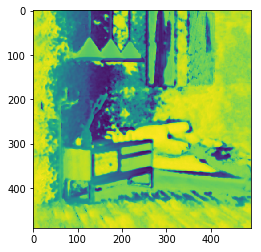

bicycle : 0.45291(s)


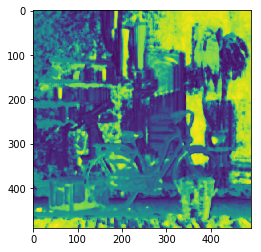

herbs : 0.43850(s)


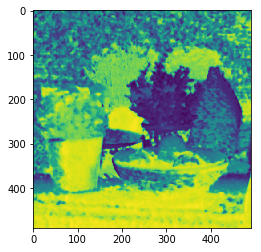

origami : 0.44012(s)


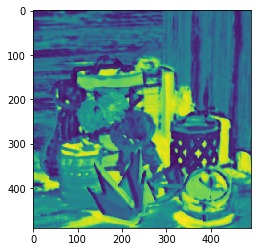

In [12]:
for image_path in dataset.image_paths:
    light_field = dataset.data(image_path)
    tmp = np.empty((512, 512, 1))
    val_90d_list = []
    val_0d_list = []
    val_45d_list = []
    val_M45d_list = []
    if 'test' in image_path:
        for i in range(4,81,9):
            val_90d_list.append(light_field[i])
        for i in range(0, len(val_90d_list)):
            if i == 0:
                tmp = val_90d_list[i]
                continue
            tmp = np.append(tmp, val_90d_list[i], axis = 2)
        val_90d = tmp.reshape(-1, 512, 512, 9)
        
        for i in range(36,45,1):
            val_0d_list.append(light_field[i])
        for i in range(0, len(val_0d_list)):
            if i == 0:
                tmp = val_0d_list[i]
                continue
            tmp = np.append(tmp, val_0d_list[i], axis = 2)
        val_0d = tmp.reshape(-1, 512, 512, 9)
        
        for i in range(8,80,8):
            val_45d_list.append(light_field[i])
        for i in range(0, len(val_45d_list)):
            if i == 0:
                tmp = val_45d_list[i]
                continue
            tmp = np.append(tmp, val_45d_list[i], axis = 2)
        val_45d = tmp.reshape(-1, 512, 512, 9)
        
        for i in range(0,81,10):
            val_M45d_list.append(light_field[i])
        for i in range(0, len(val_M45d_list)):
            if i == 0:
                tmp = val_M45d_list[i]
                continue
            tmp = np.append(tmp, val_M45d_list[i], axis = 2)
        val_M45d = tmp.reshape(-1, 512, 512, 9)
        
        start=time.clock()
        # predict
        val_output_tmp=epinet_predict.predict([val_90d, val_0d, val_45d, val_M45d],
                                              batch_size=1);
        runtime = time.clock() - start
        print(image_path.split('/')[-1], end=" : "); print("%.5f(s)" % runtime);
        plt.imshow(val_output_tmp[0,:,:,0])
        plt.show()
        # save .pfm file
        dataset.write_pfm(val_output_tmp[0,:,:,0], dir_output+'/%s.pfm' % (image_path.split('/')[-1]))

antinous : 0.47202(s)


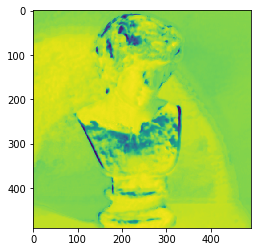

boardgames : 0.42989(s)


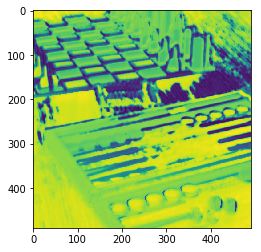

dishes : 0.47870(s)


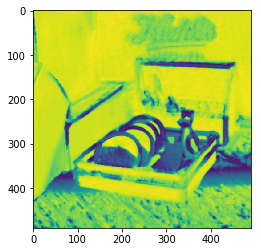

greek : 0.45074(s)


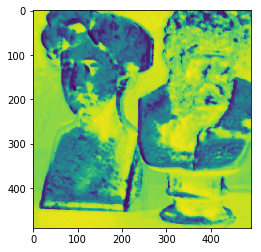

kitchen : 0.43909(s)


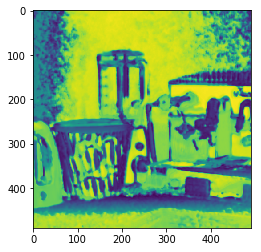

medieval2 : 0.44218(s)


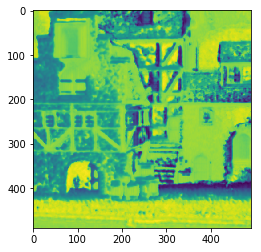

museum : 0.43388(s)


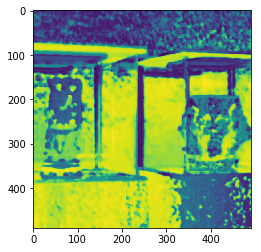

pens : 0.43789(s)


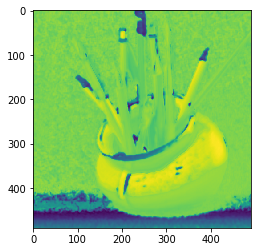

pillows : 0.44507(s)


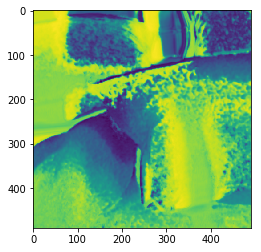

platonic : 0.44476(s)


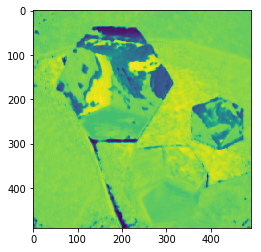

rosemary : 0.43976(s)


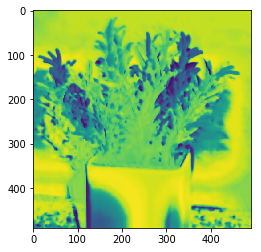

table : 0.43771(s)


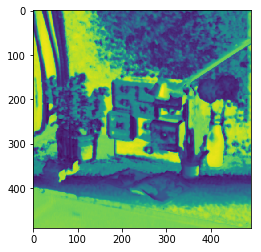

tomb : 0.44607(s)


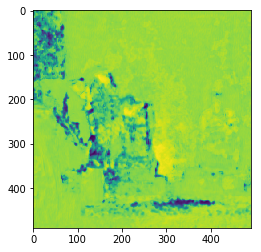

tower : 0.44774(s)


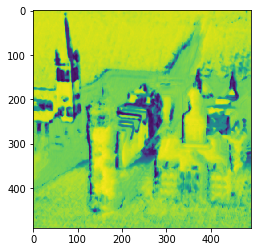

town : 0.44388(s)


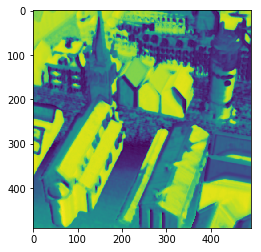

vinyl : 0.43829(s)


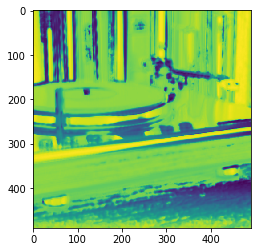

backgammon : 0.44288(s)


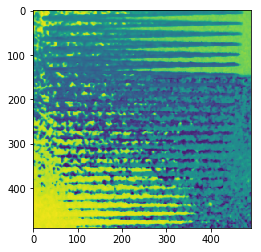

dots : 0.44426(s)


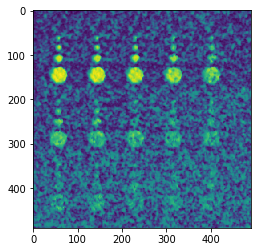

pyramids : 0.43639(s)


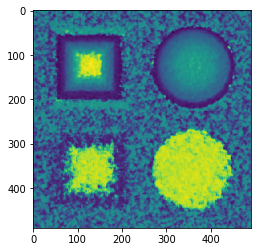

stripes : 0.45577(s)


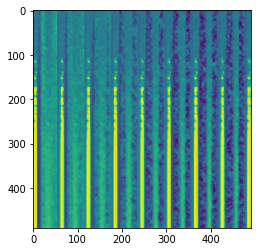

boxes : 0.44204(s)


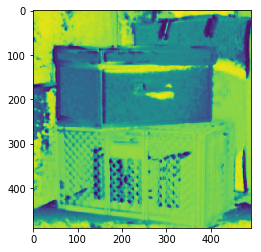

cotton : 0.45036(s)


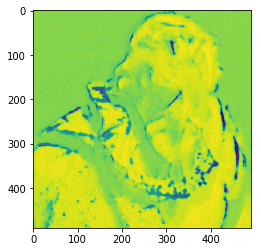

dino : 0.43277(s)


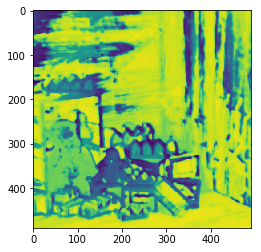

sideboard : 0.45814(s)


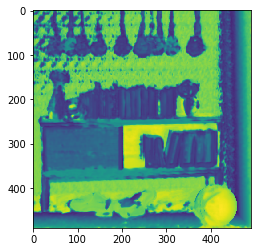

In [13]:
for image_path in dataset.image_paths:
    if 'test' in image_path:
        continue
    
    light_field = dataset.data(image_path)
    tmp = np.empty((512, 512, 1))
    val_90d_list = []
    val_0d_list = []
    val_45d_list = []
    val_M45d_list = []

    for i in range(4,81,9):
        val_90d_list.append(light_field[i])
    for i in range(0, len(val_90d_list)):
        if i == 0:
            tmp = val_90d_list[i]
            continue
        tmp = np.append(tmp, val_90d_list[i], axis = 2)
    val_90d = tmp.reshape(-1, 512, 512, 9)
        
    for i in range(36,45,1):
        val_0d_list.append(light_field[i])
    for i in range(0, len(val_0d_list)):
        if i == 0:
            tmp = val_0d_list[i]
            continue
        tmp = np.append(tmp, val_0d_list[i], axis = 2)
    val_0d = tmp.reshape(-1, 512, 512, 9)
        
    for i in range(8,80,8):
        val_45d_list.append(light_field[i])
    for i in range(0, len(val_45d_list)):
        if i == 0:
            tmp = val_45d_list[i]
            continue
        tmp = np.append(tmp, val_45d_list[i], axis = 2)
    val_45d = tmp.reshape(-1, 512, 512, 9)
        
    for i in range(0,81,10):
        val_M45d_list.append(light_field[i])
    for i in range(0, len(val_M45d_list)):
        if i == 0:
            tmp = val_M45d_list[i]
            continue
        tmp = np.append(tmp, val_M45d_list[i], axis = 2)
    val_M45d = tmp.reshape(-1, 512, 512, 9)
        
    start=time.clock()
    # predict
    val_output_tmp=epinet_predict.predict([val_90d, val_0d, val_45d, val_M45d],
                                              batch_size=1);
    runtime = time.clock() - start
    print(image_path.split('/')[-1], end=" : "); print("%.5f(s)" % runtime);
    plt.imshow(val_output_tmp[0,:,:,0])
    plt.show()
    # save .pfm file
    dataset.write_pfm(val_output_tmp[0,:,:,0], dir_output+'/%s.pfm' % (image_path.split('/')[-1]))